<a href="https://colab.research.google.com/github/ArunKumarSP10/newpub/blob/main/ANN_LoanCredit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import io
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
import time
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# # For Plotting
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
# Plot and Other Display Settings.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
training_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hackathon/train.csv')

In [ ]:
testing_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hackathon/test.csv')

In [ ]:
training_df.shape

(1106674, 62)

In [ ]:
testing_df.shape

(474289, 60)

In [ ]:
total_records = len(training_df['record_number'])
distinct_records = training_df['record_number'].nunique()

if total_records == distinct_records:
    print("No repeating values.")
else:
    print("There are repeating values.")
    print(total_records)
    print(distinct_records)

There are repeating values.
1106674
46


In [ ]:
distinct_elements = training_df['record_number'].unique()
print(distinct_elements)

[ 7  5  1 11 12 10 33  8 19  3 18  4  2 15  6  9 16 14 21 13 23 20 29 17
 30 24 27 22 25 32 26 34 35 28 36 31 45 38 40 37 39 41 43 42 47 46]


In [ ]:
cols = ['record_number'
,'days_since_opened'
,'days_since_confirmed'
,'primary_term'
,'final_term'
,'days_till_primary_close'
,'days_till_final_close'
,'loans_credit_limit'
,'loans_next_payment_summary'
,'loans_outstanding_balance'
,'loans_max_overdue_amount'
,'loans_credit_cost_rate'
,'loans_within_5_days'
,'loans_within_5_to_30_days'
,'loans_within_30_to_60_days'
,'loans_within_60_to_90_days'
,'loans_over_90_days'
,'is_zero_loans_within_5_days'
,'is_zero_loans_within_5_to_30_days'
,'is_zero_loans_within_30_to_60_days'
,'is_zero_loans_within_60_to_90_days'
,'is_zero_loans_over_90_days'
,'utilization'
,'over_limit_count'
,'max_over_limit_count'
,'is_zero_utilization'
,'is_zero_over_limit_count'
,'is_zero_max_over_limit_count']

In [ ]:
for col in cols:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n")

In [ ]:
for col in training_df.columns:
    print("Distinct Values of ", col, " : ",training_df[col].nunique())
    #print(training_df[col].nunique())
    #print(training_df[col].value_counts())
    #print('\n')

Distinct Values of  record_number  :  46
Distinct Values of  days_since_opened  :  20
Distinct Values of  days_since_confirmed  :  18
Distinct Values of  primary_term  :  18
Distinct Values of  final_term  :  17
Distinct Values of  days_till_primary_close  :  17
Distinct Values of  days_till_final_close  :  16
Distinct Values of  loans_credit_limit  :  20
Distinct Values of  loans_next_payment_summary  :  7
Distinct Values of  loans_outstanding_balance  :  5
Distinct Values of  loans_max_overdue_amount  :  3
Distinct Values of  loans_credit_cost_rate  :  14
Distinct Values of  loans_within_5_days  :  9
Distinct Values of  loans_within_5_to_30_days  :  16
Distinct Values of  loans_within_30_to_60_days  :  6
Distinct Values of  loans_within_60_to_90_days  :  2
Distinct Values of  loans_over_90_days  :  6
Distinct Values of  is_zero_loans_within_5_days  :  2
Distinct Values of  is_zero_loans_within_5_to_30_days  :  2
Distinct Values of  is_zero_loans_within_30_to_60_days  :  2
Distinct Va

## Outlier Detection

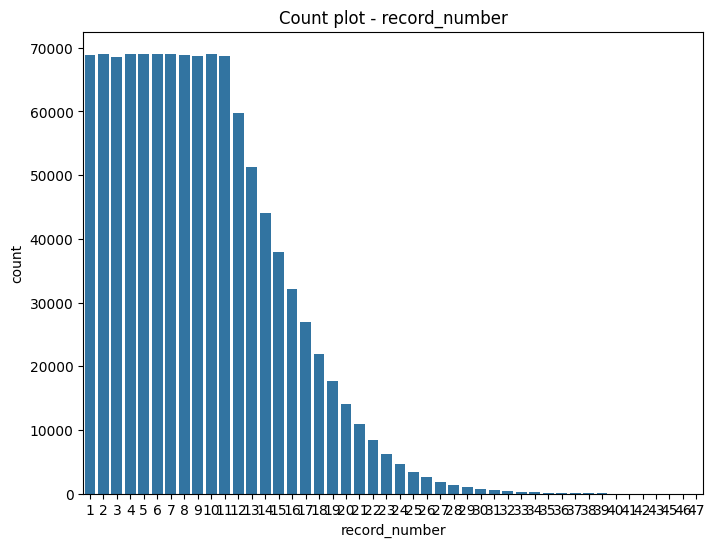

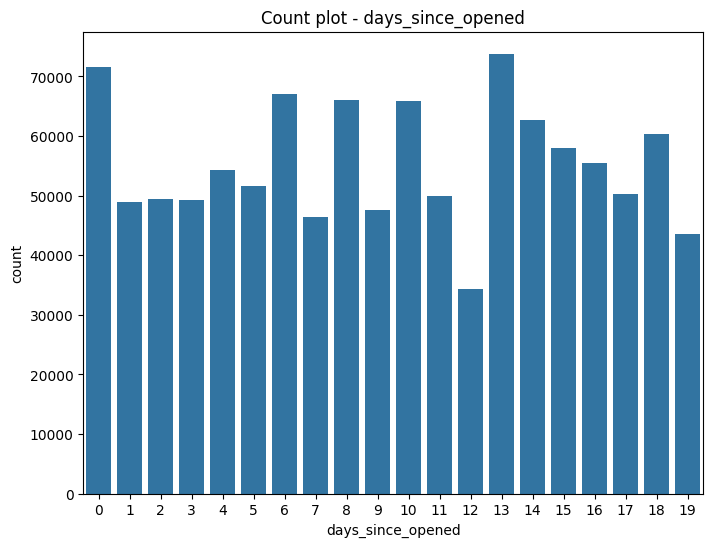

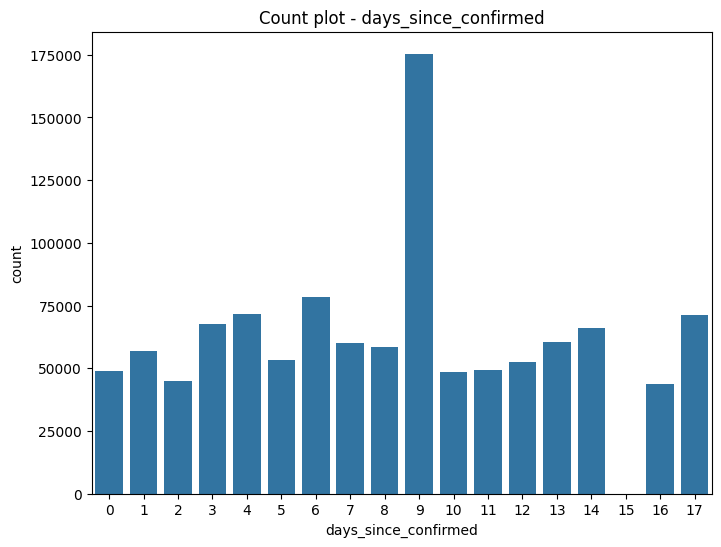

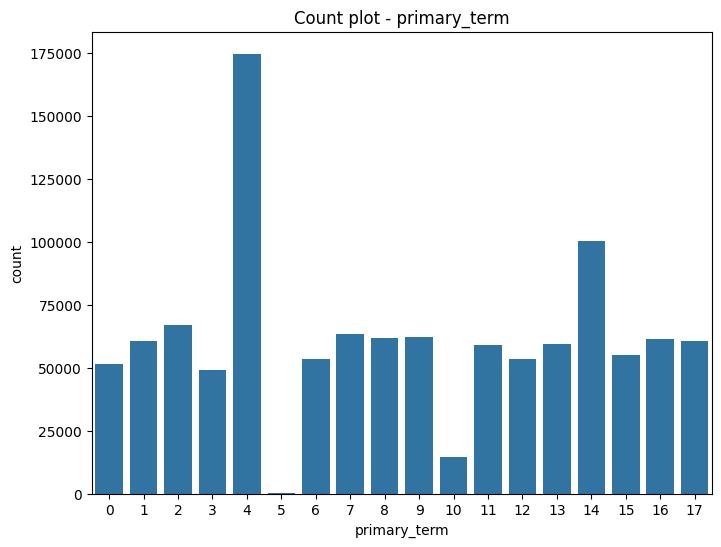

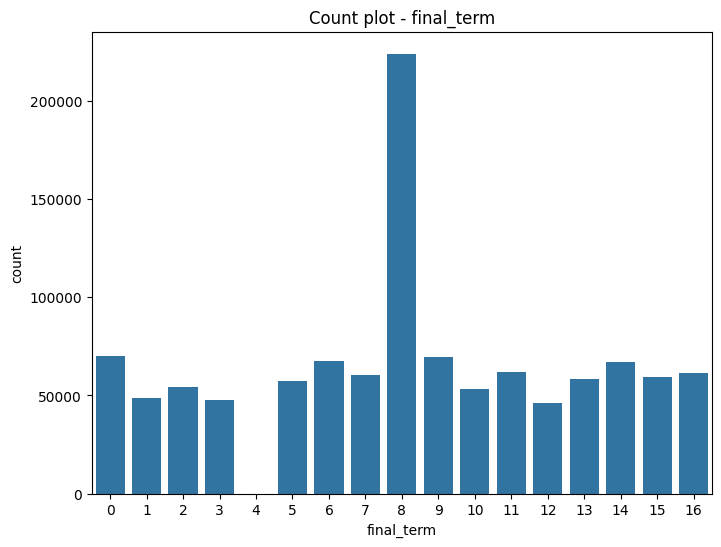

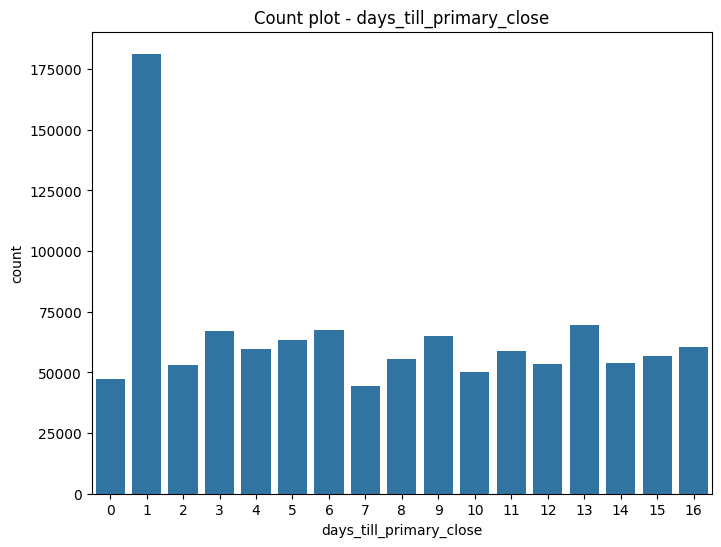

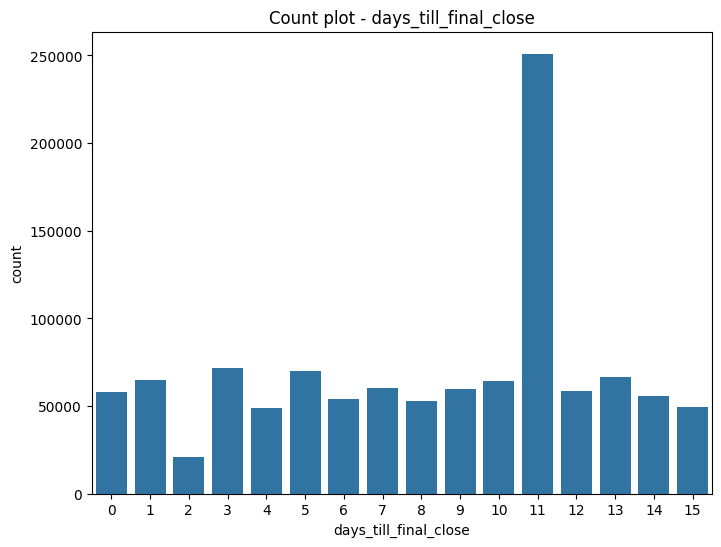

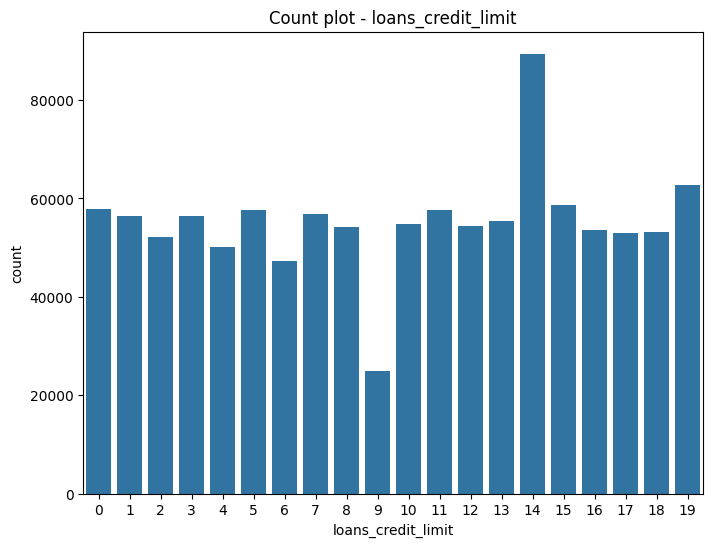

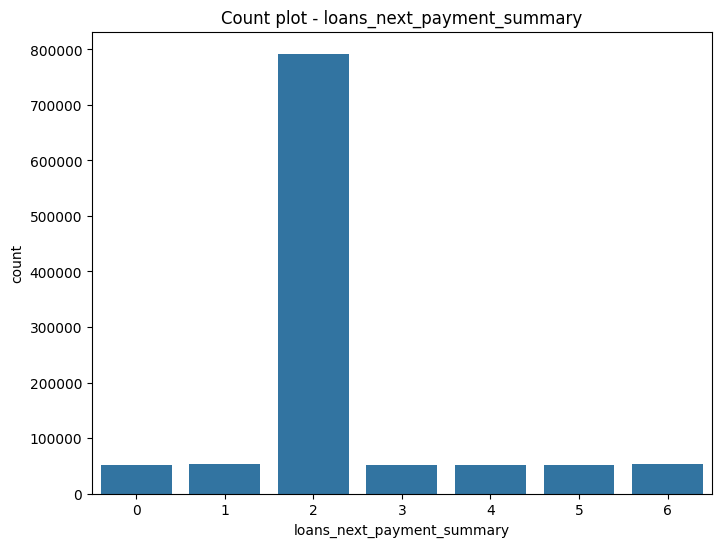

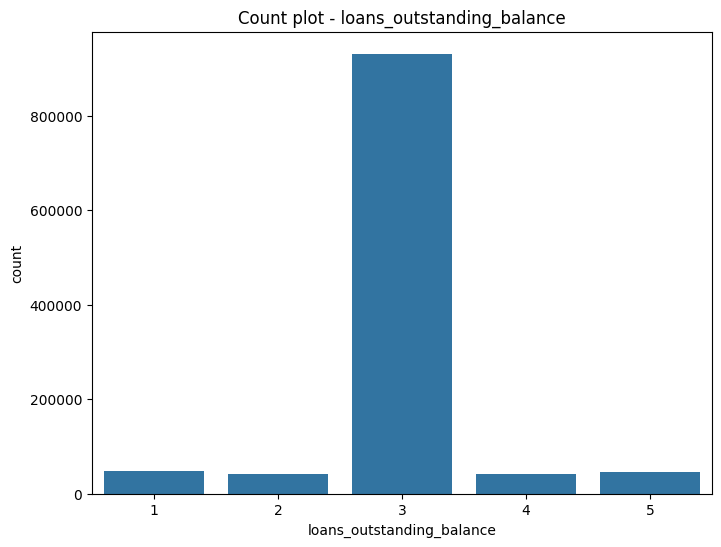

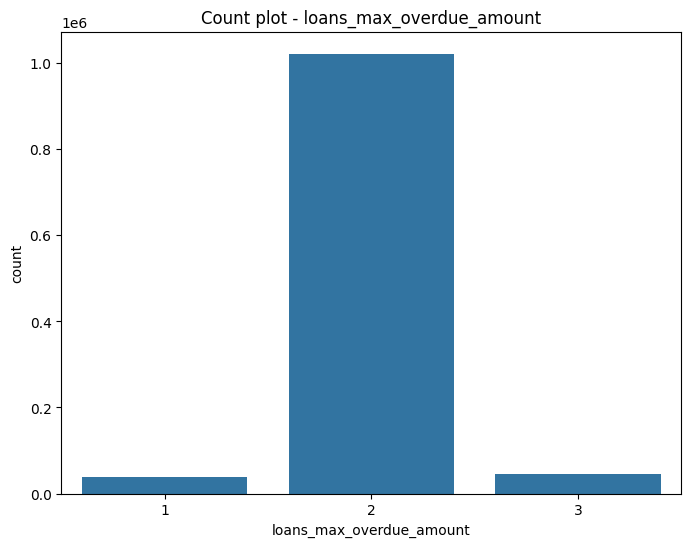

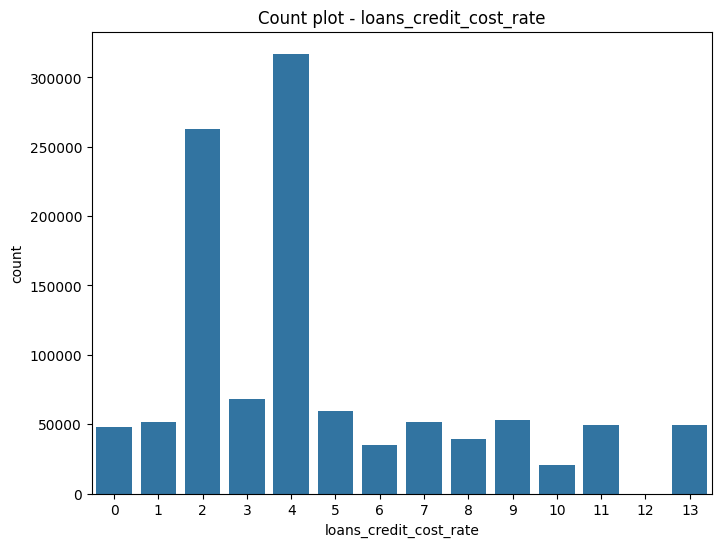

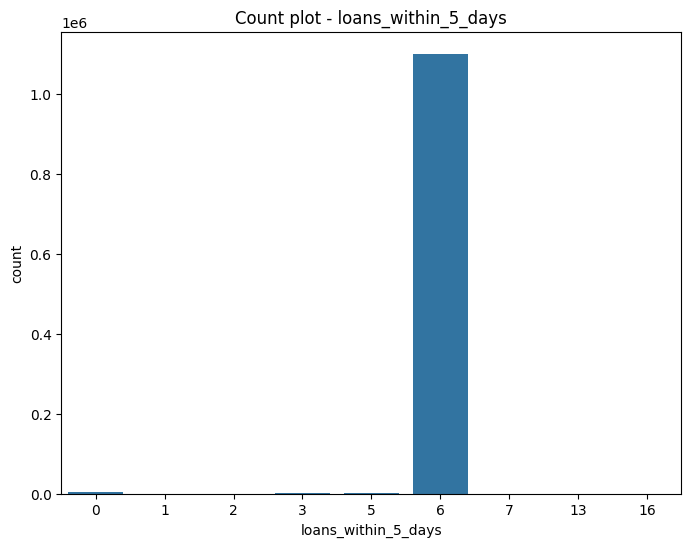

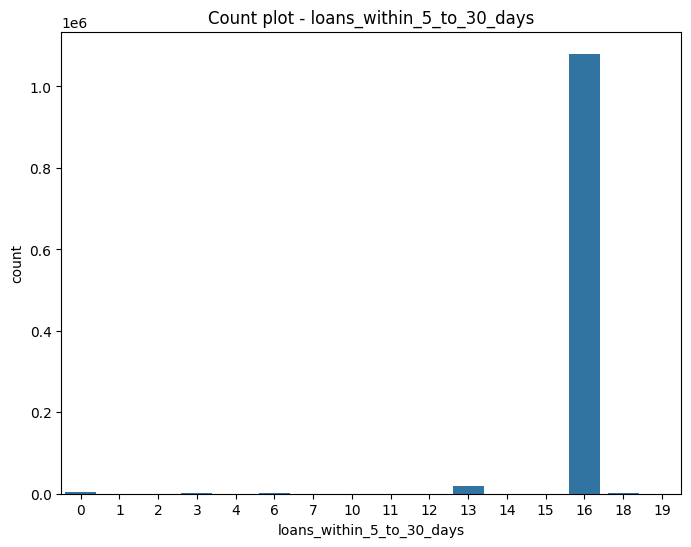

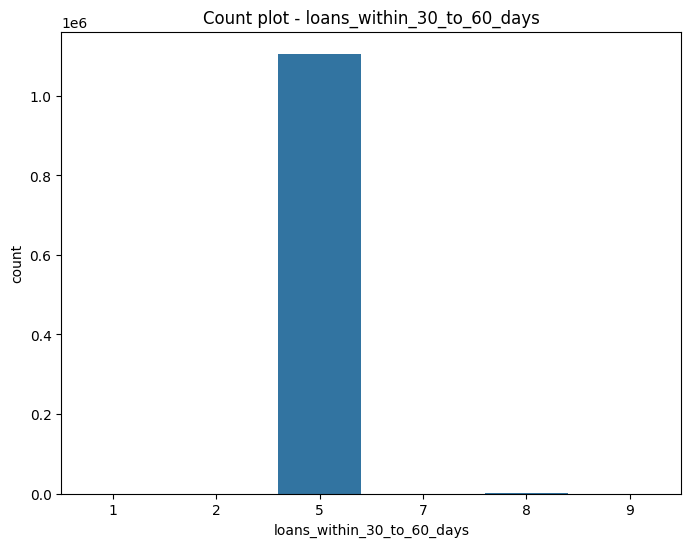

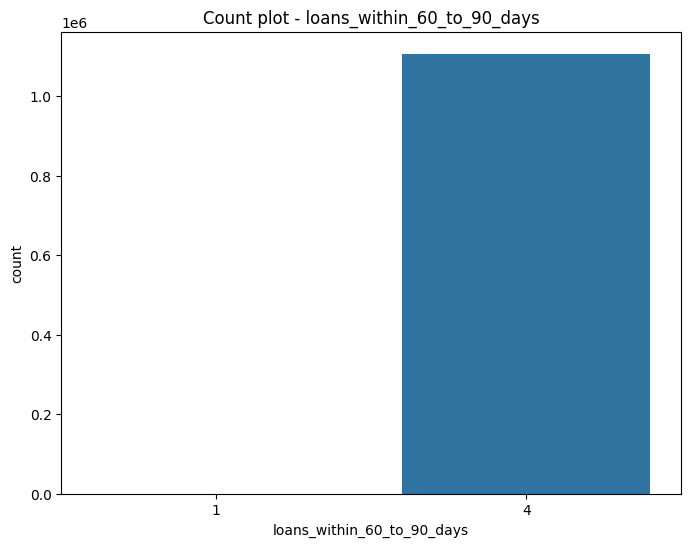

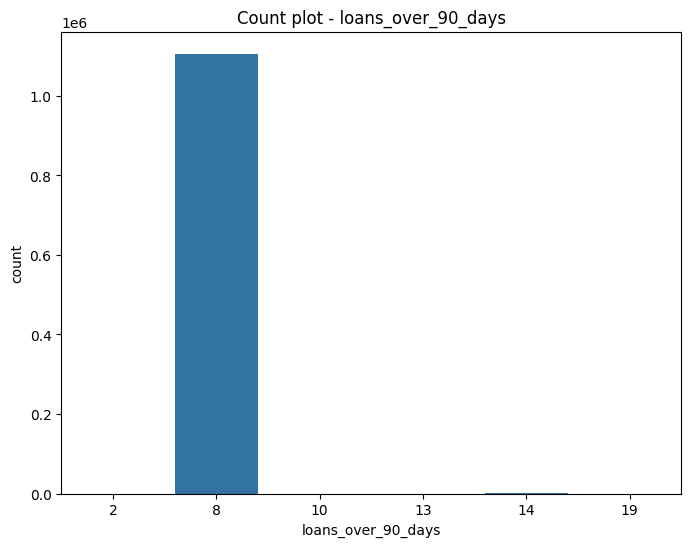

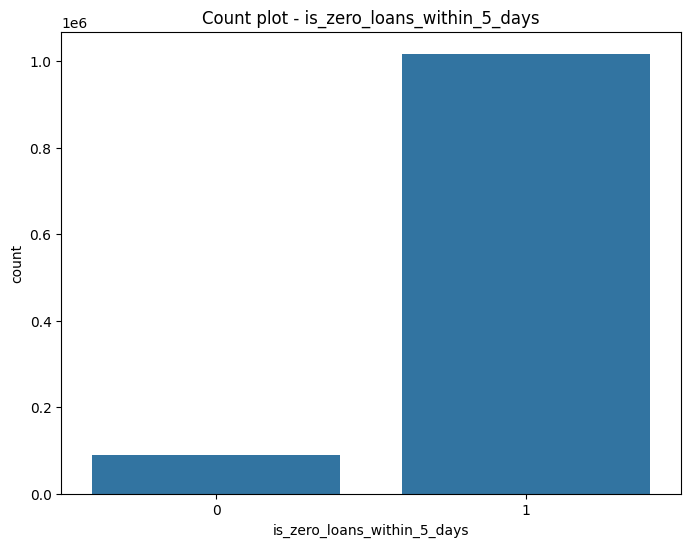

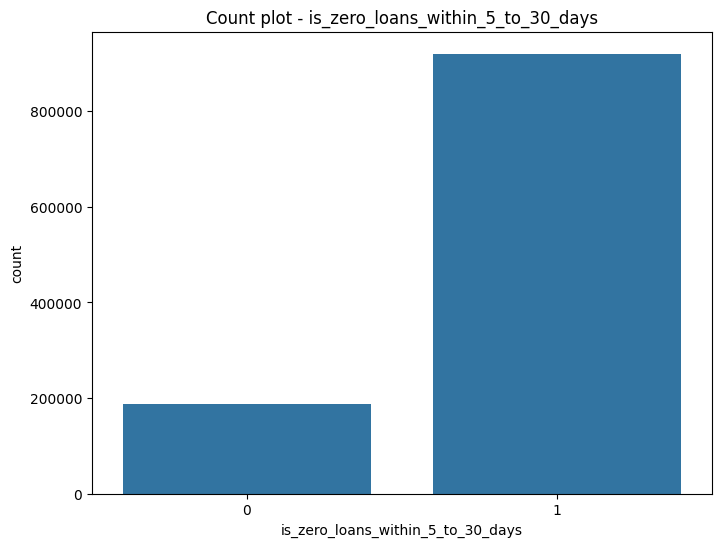

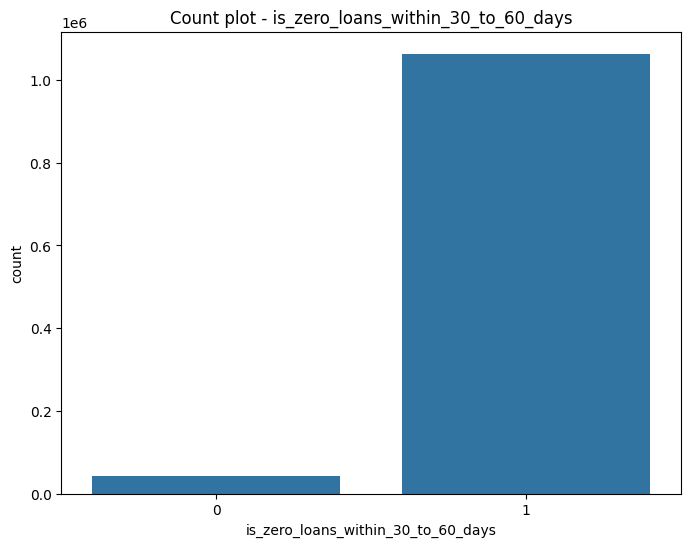

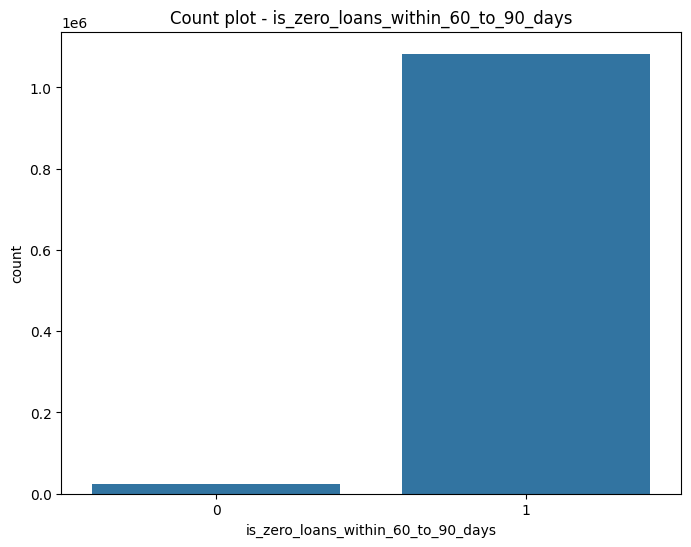

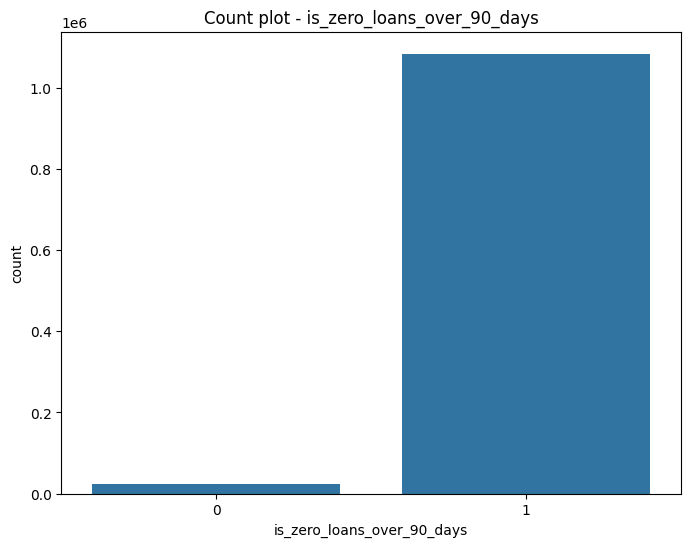

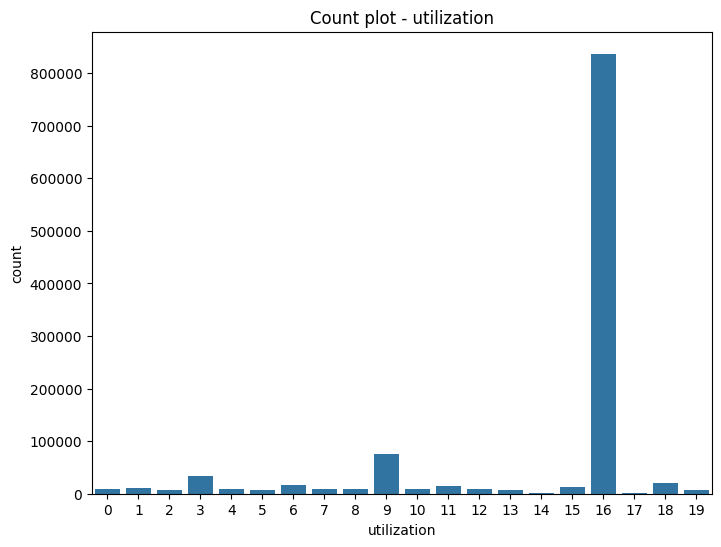

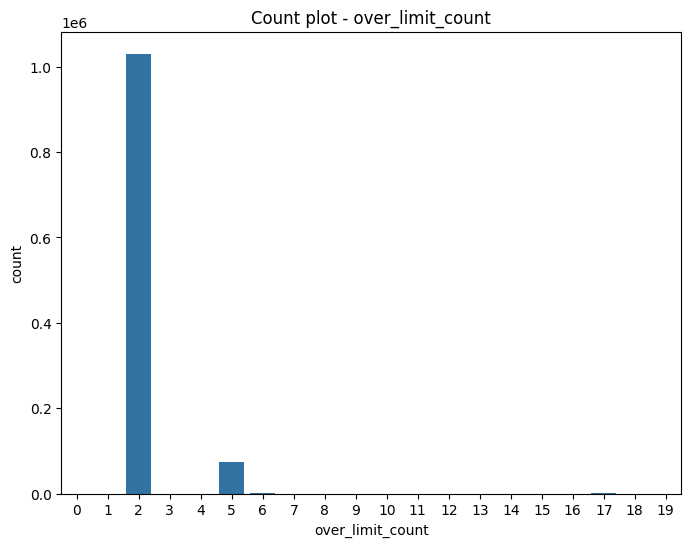

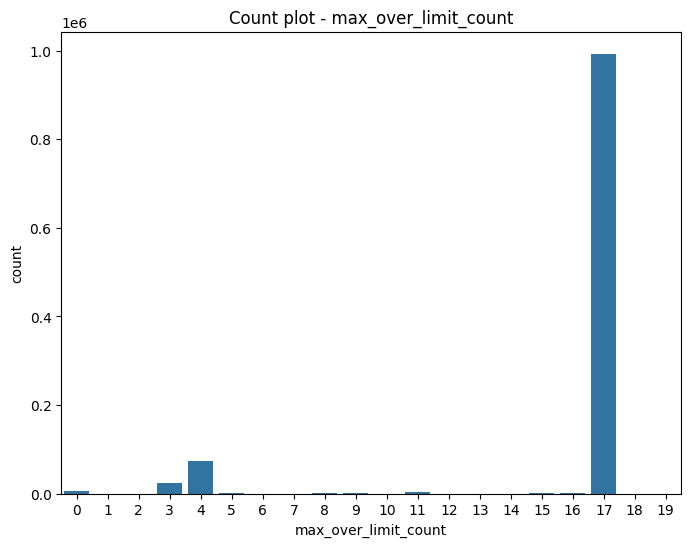

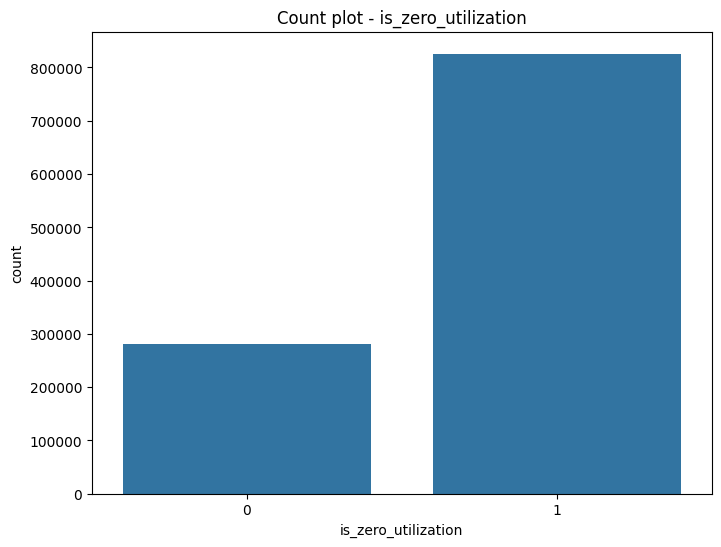

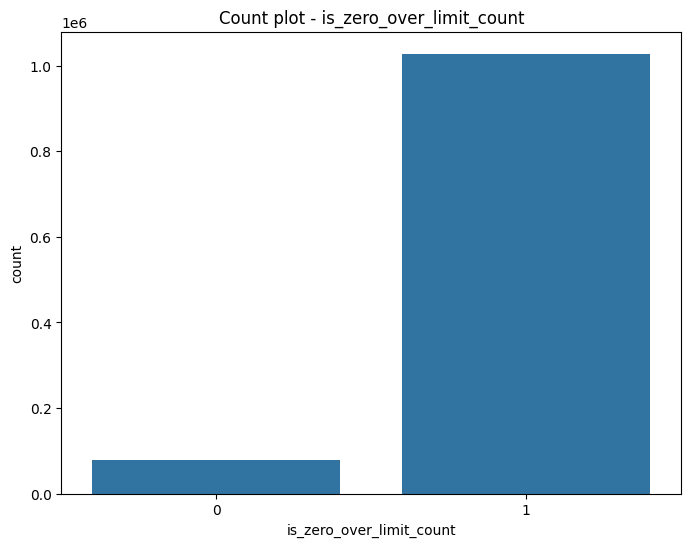

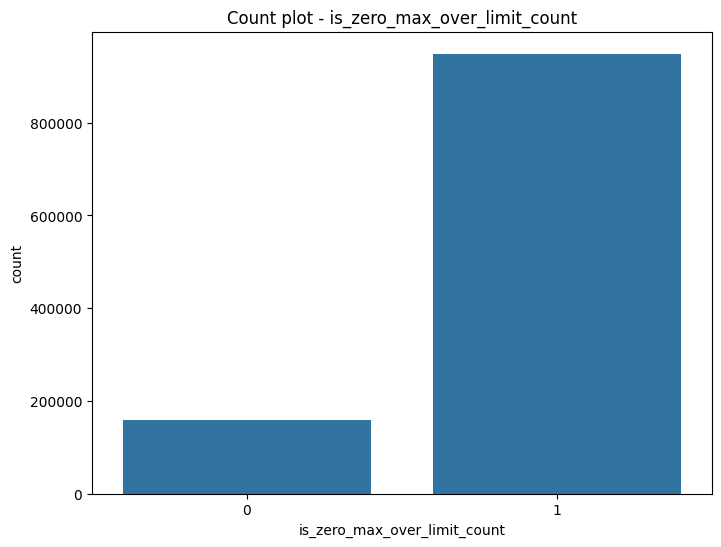

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
num_cols = training_df.select_dtypes(include=['int64', 'float64']).columns

for col in cols:
    plt.figure(figsize=(8,6))
    sns.countplot(x=training_df[col])
    plt.title('Count plot - '+str(col))
    plt.show()

In [ ]:
for col in num_cols:
    plt.figure(figsize=(8,6))
    plt.hist(training_df[col], bins=30, edgecolor='black')
    plt.title('Histogram - '+str(col))
    plt.show()

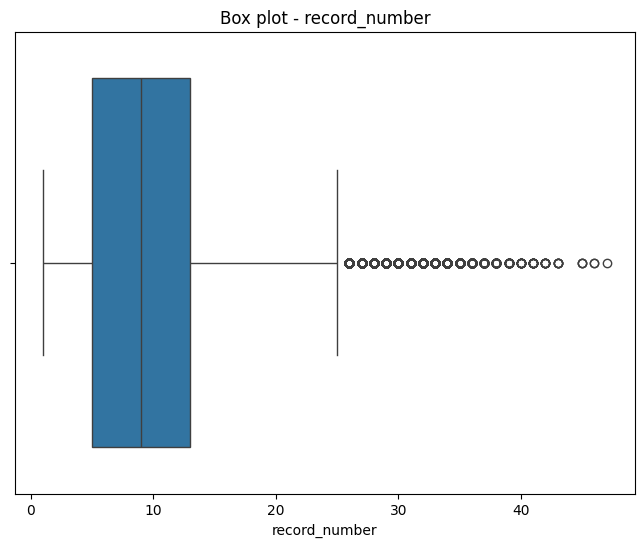

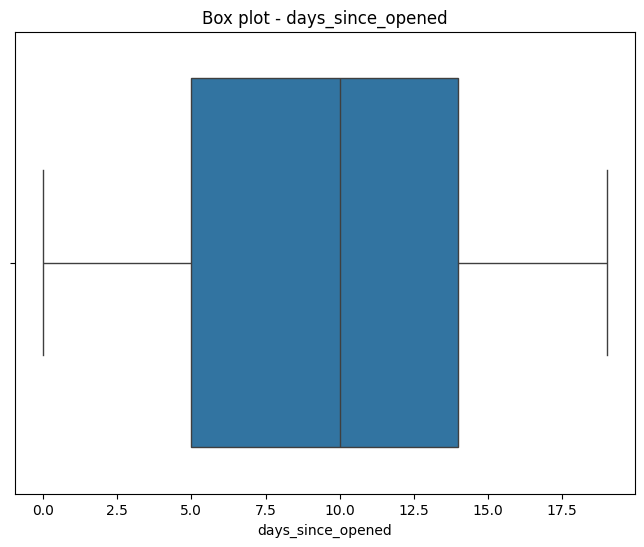

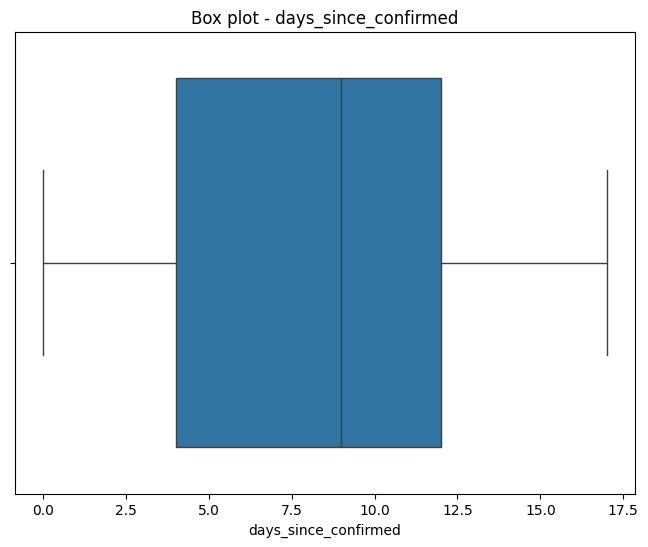

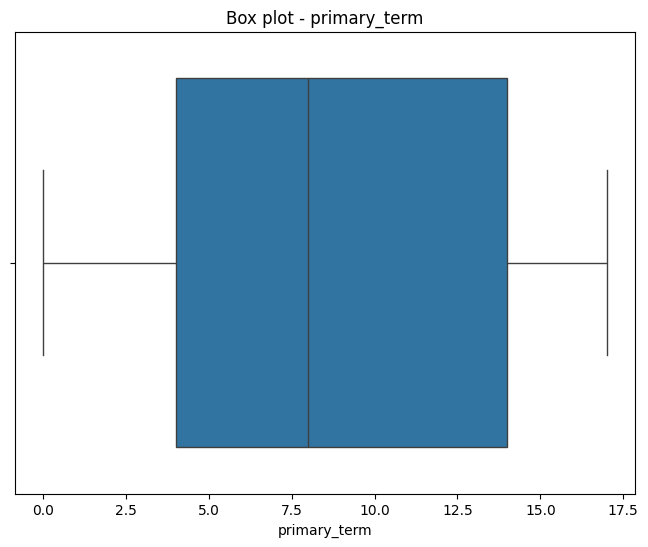

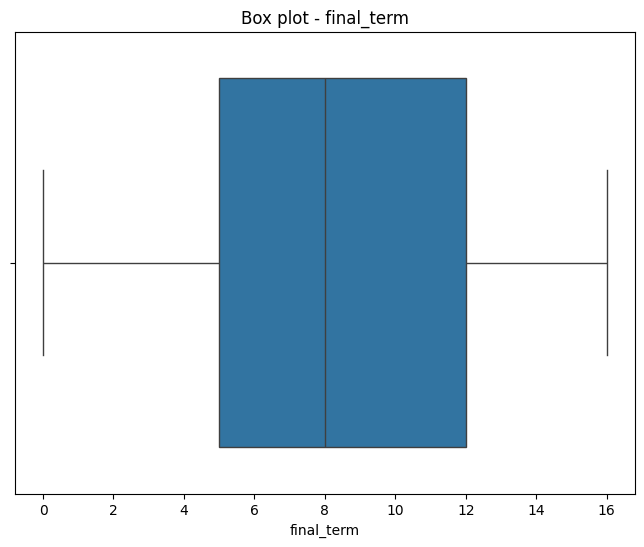

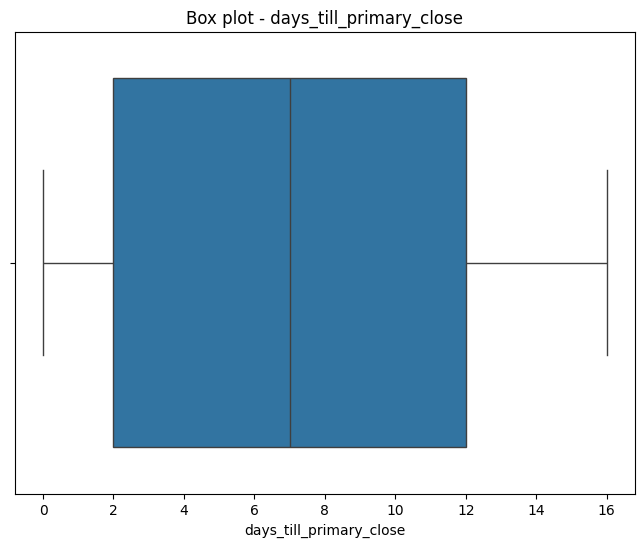

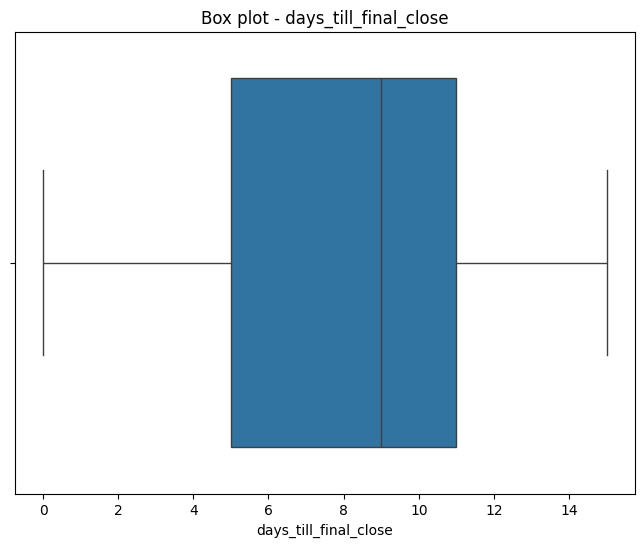

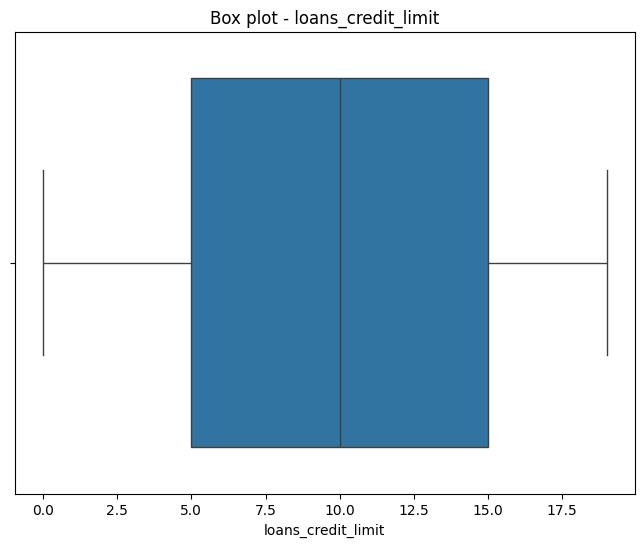

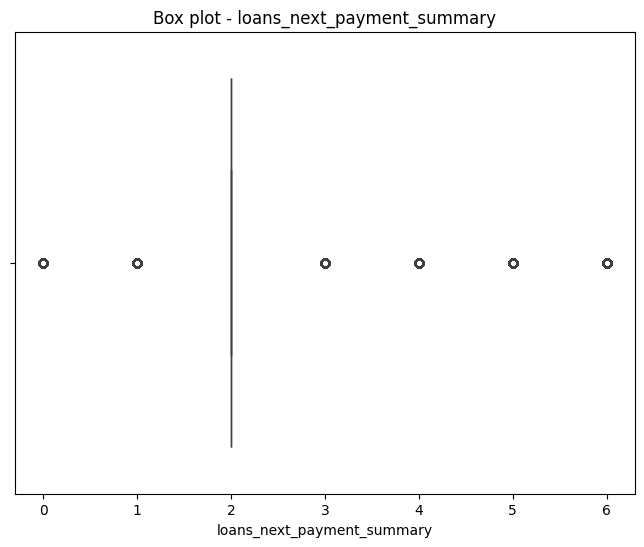

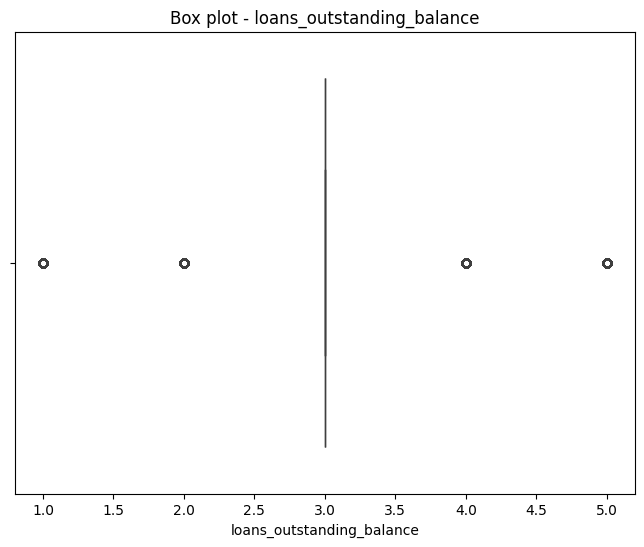

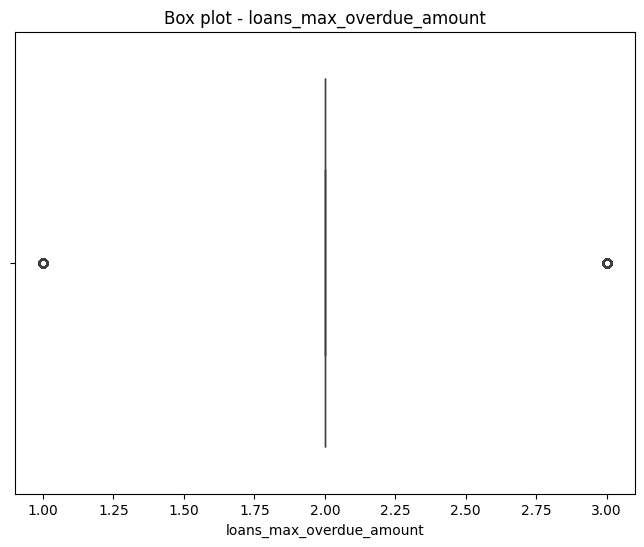

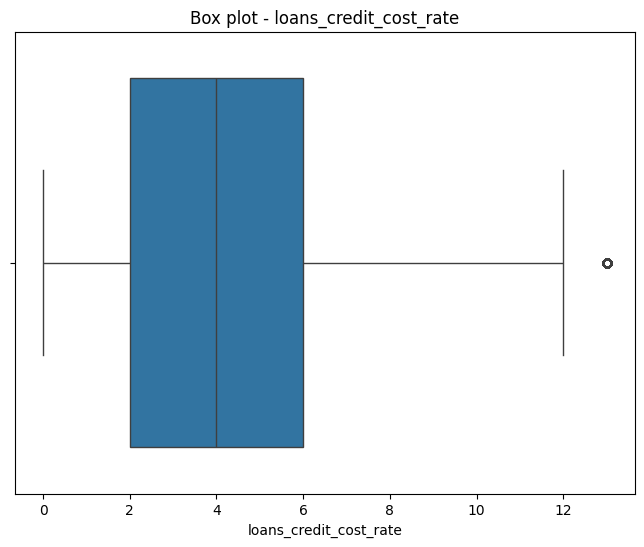

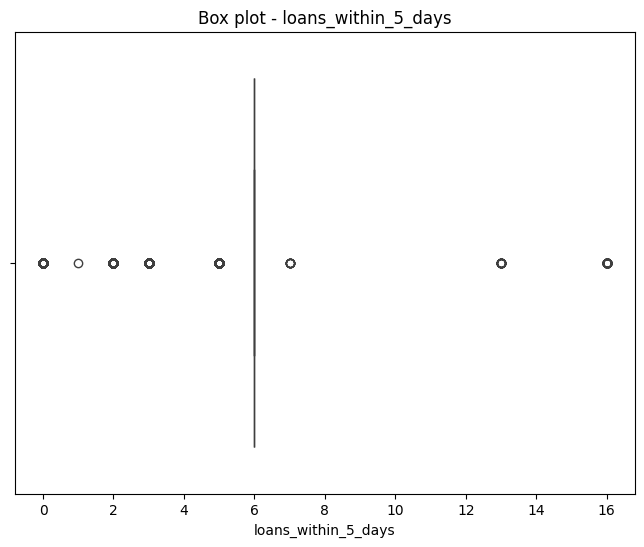

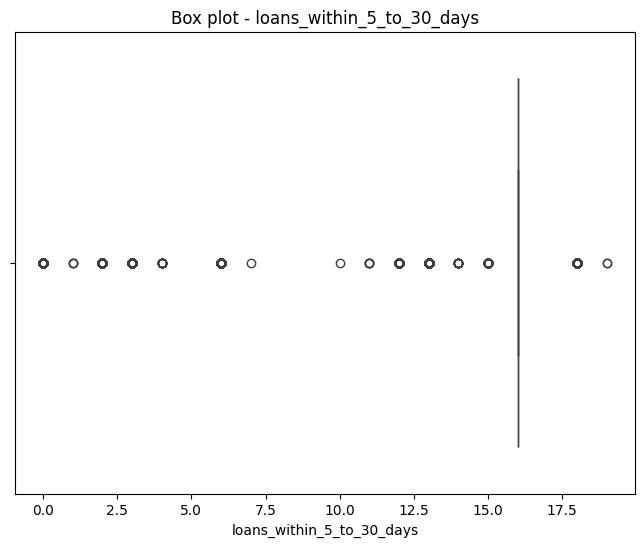

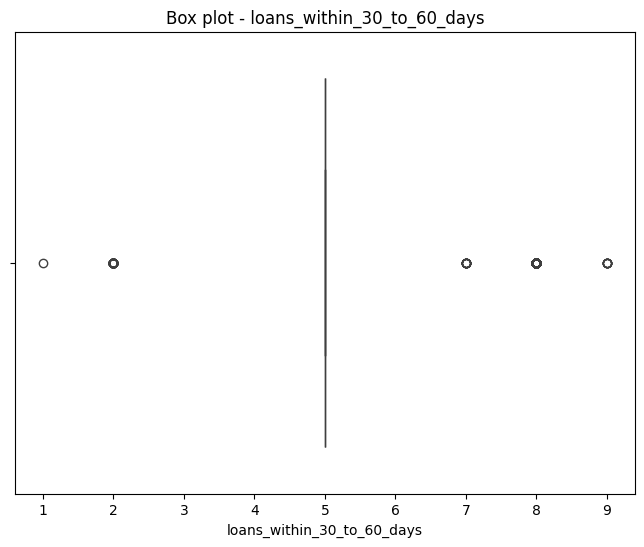

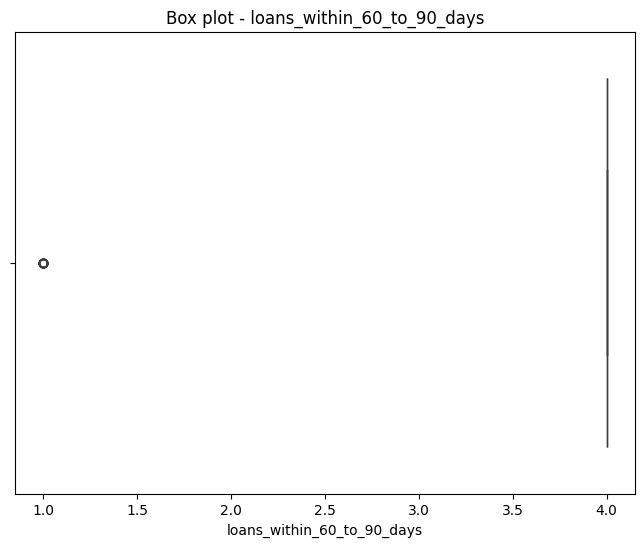

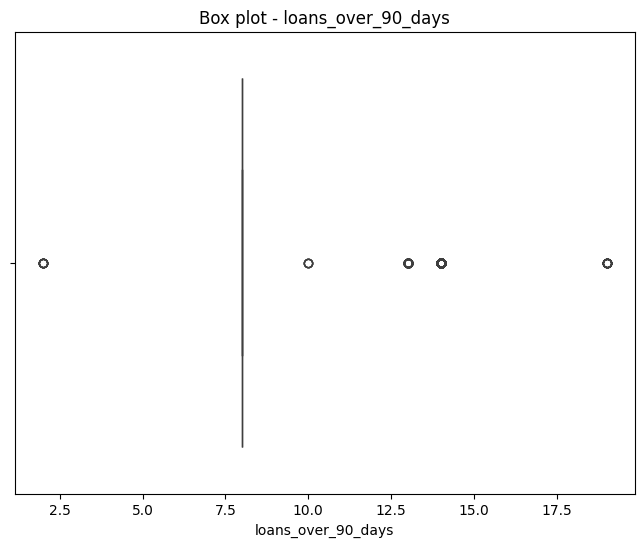

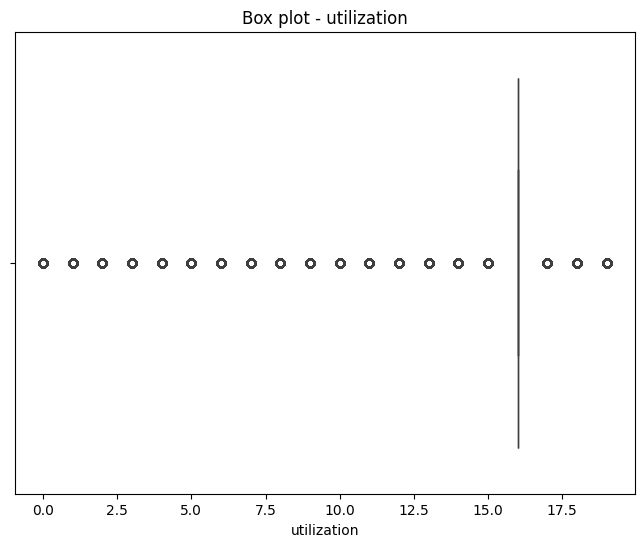

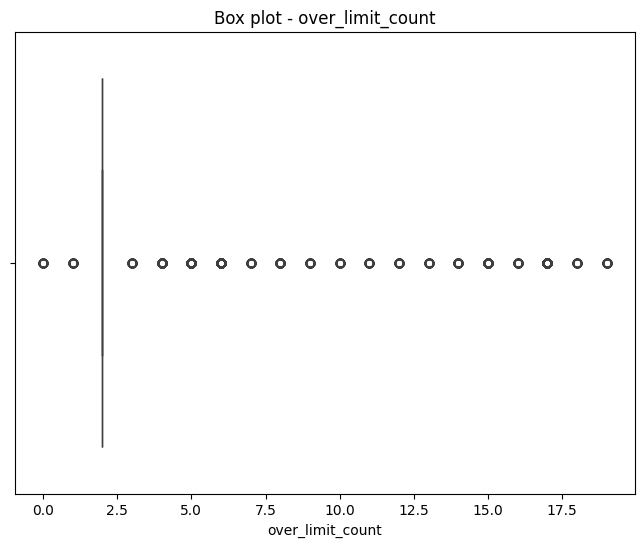

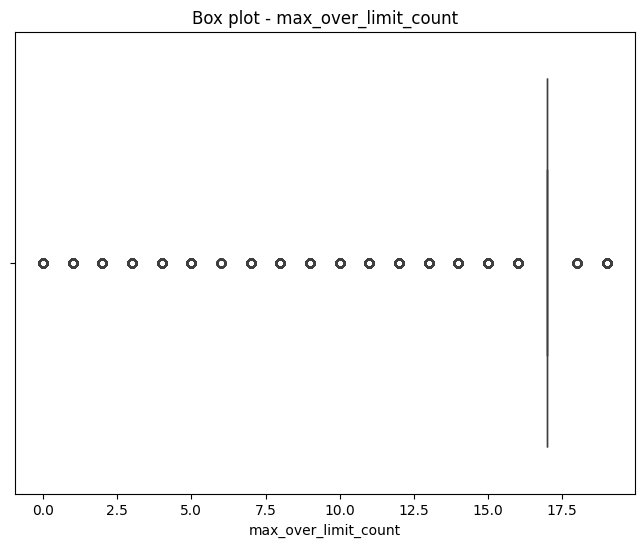

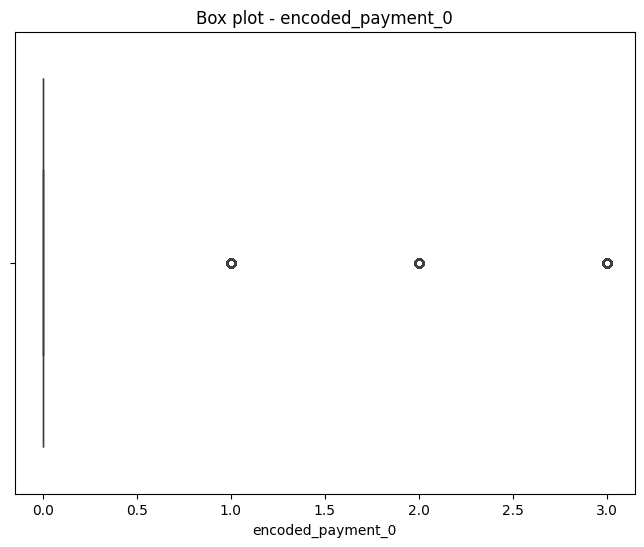

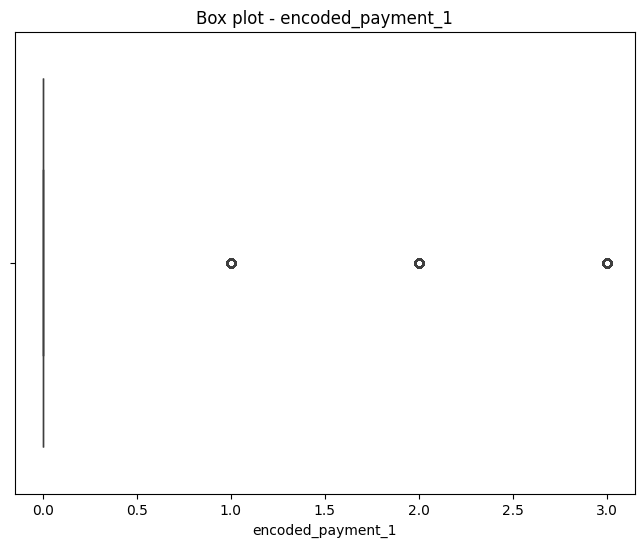

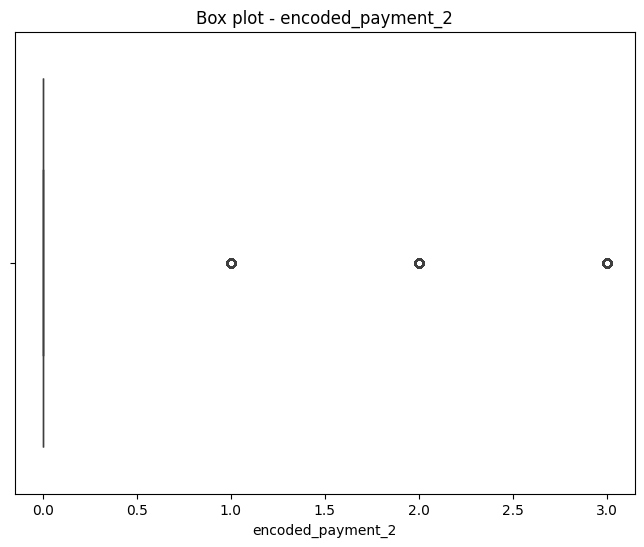

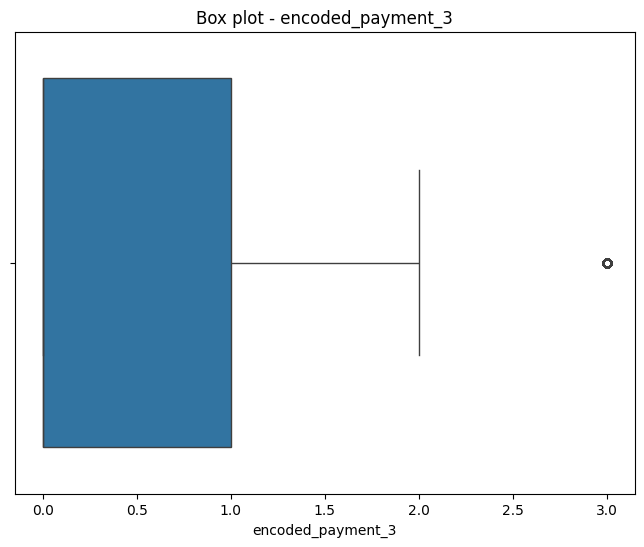

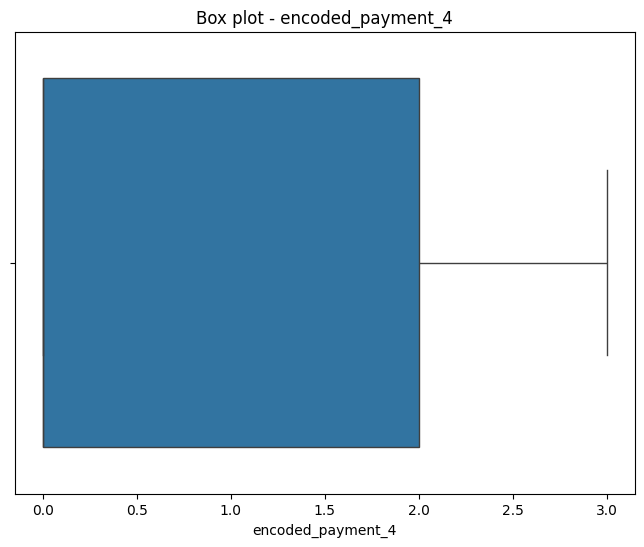

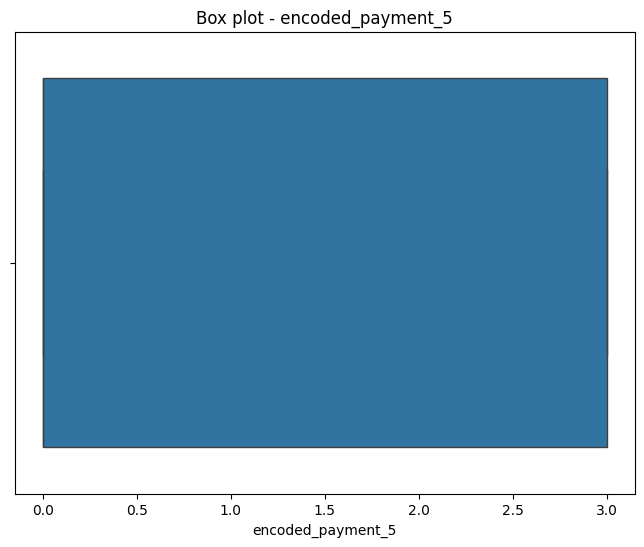

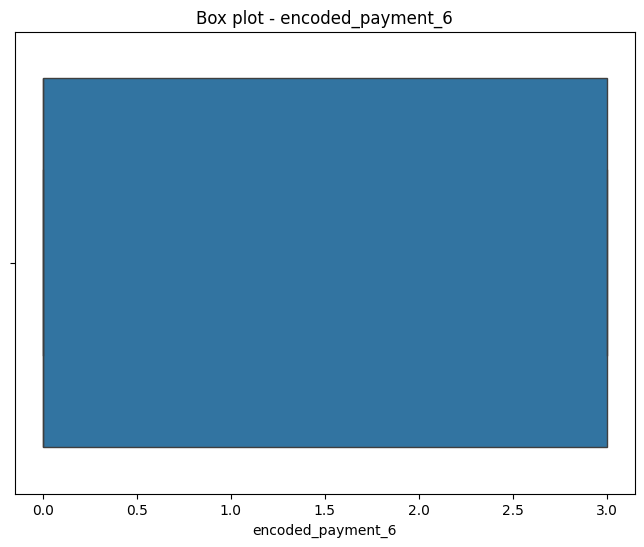

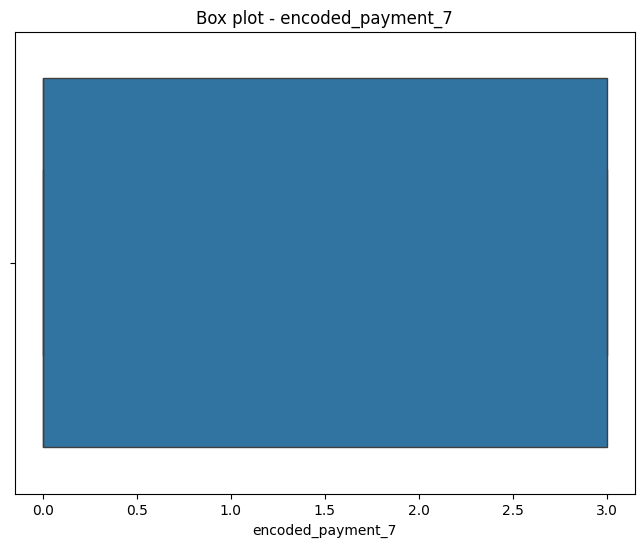

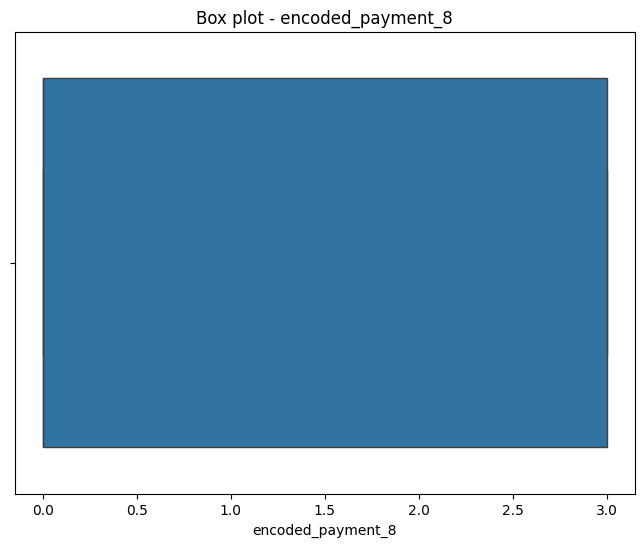

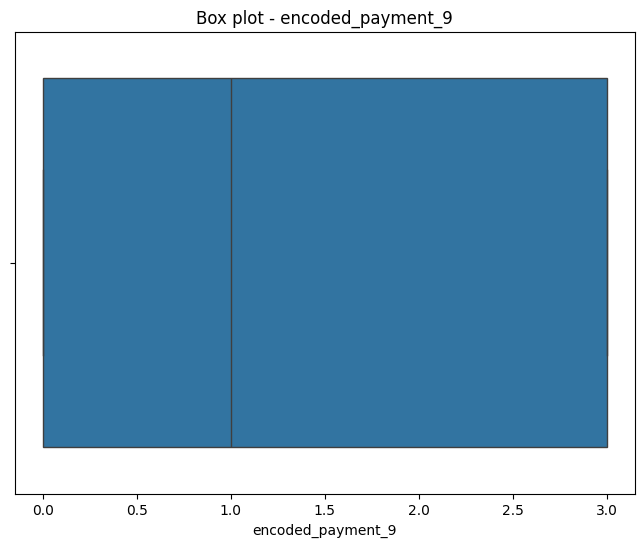

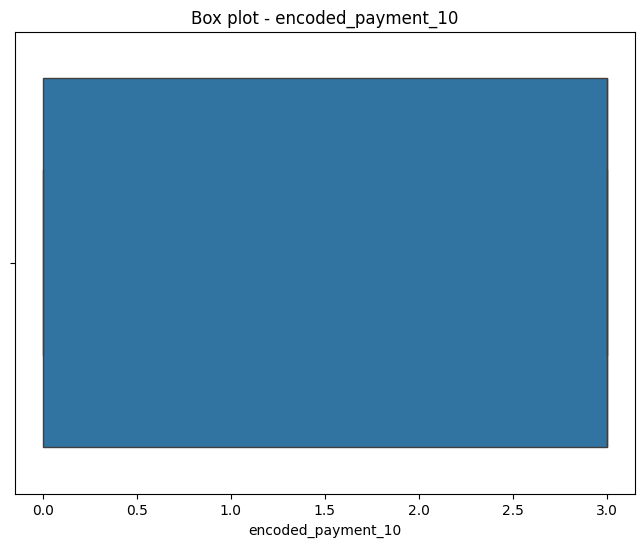

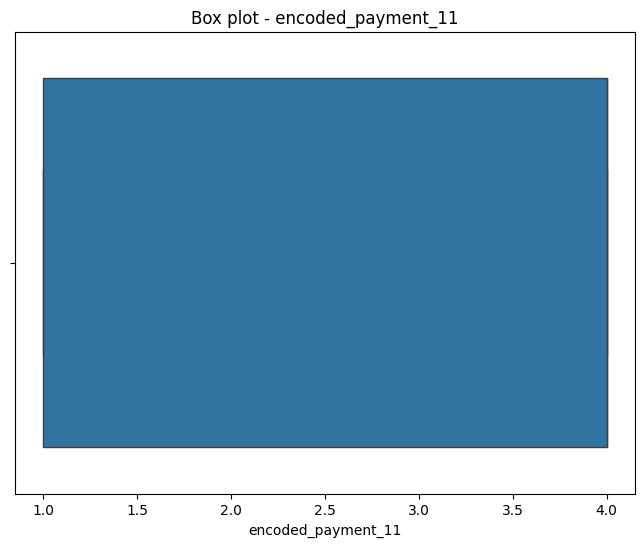

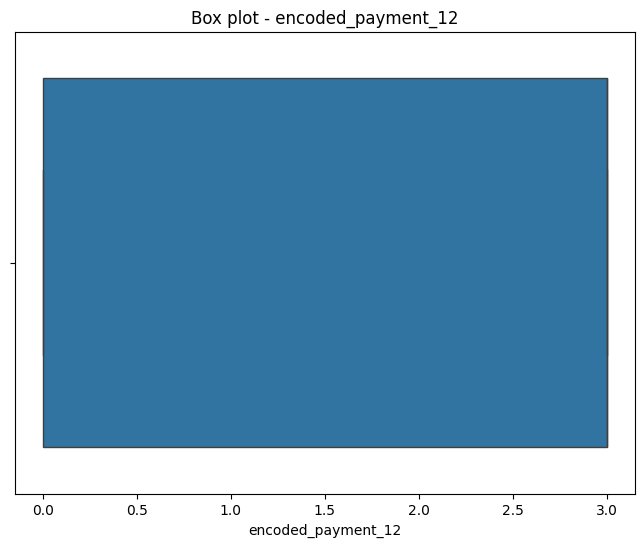

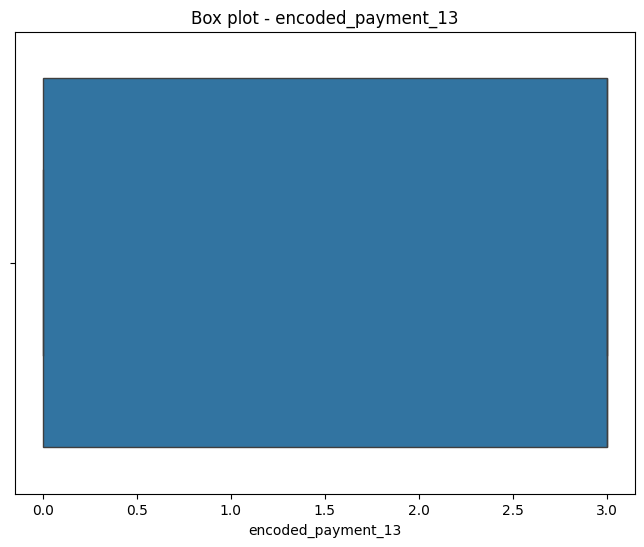

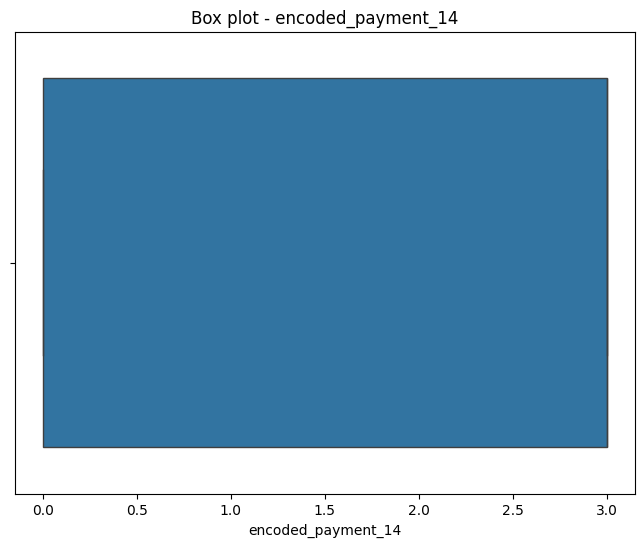

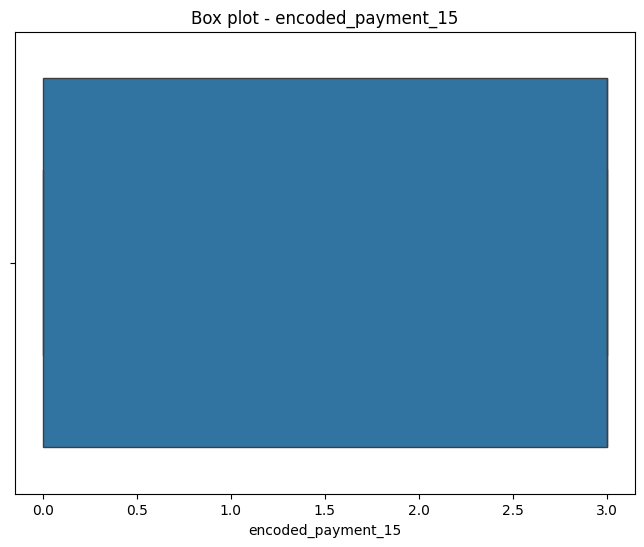

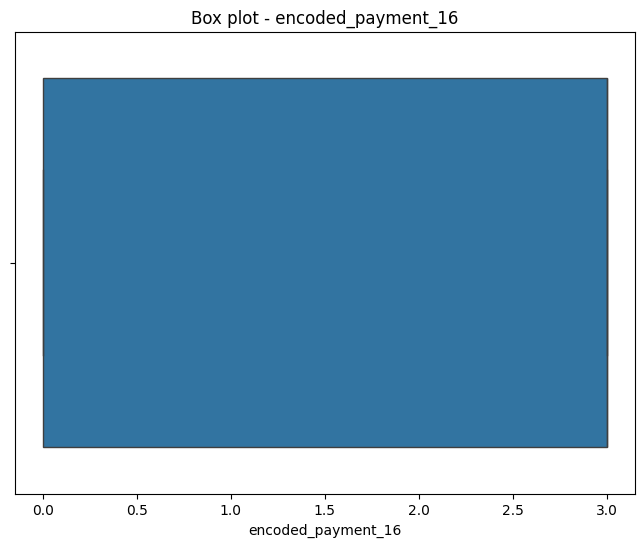

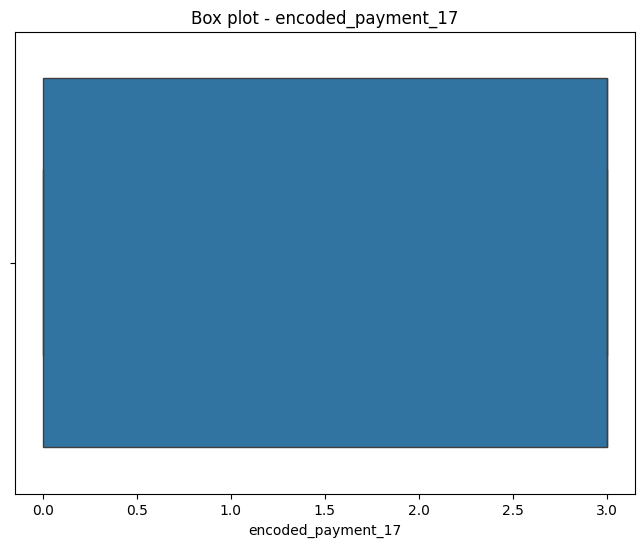

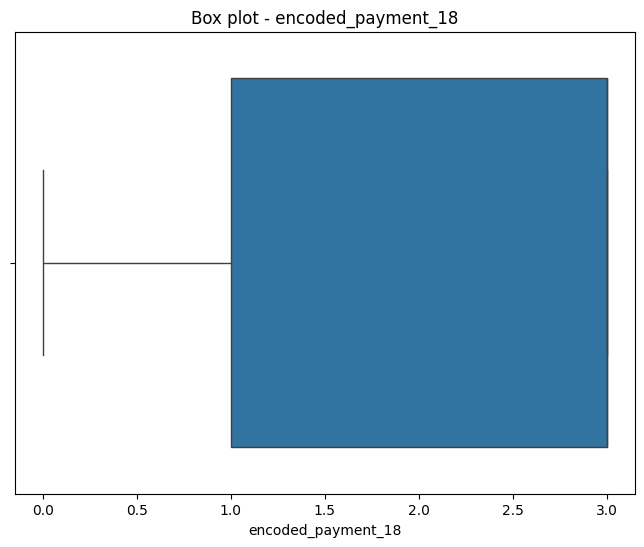

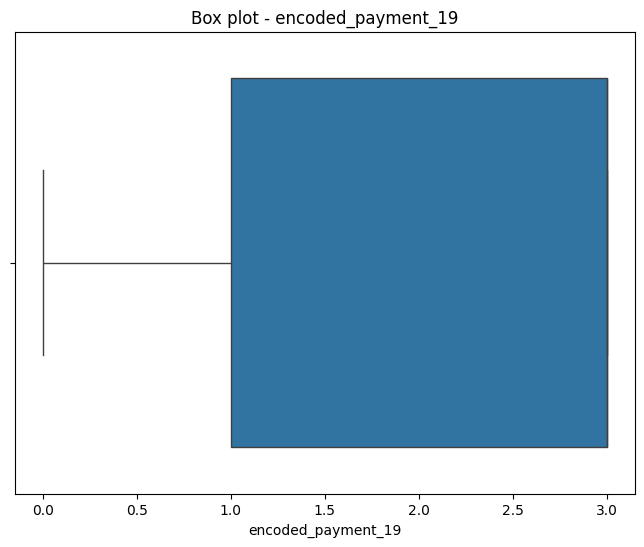

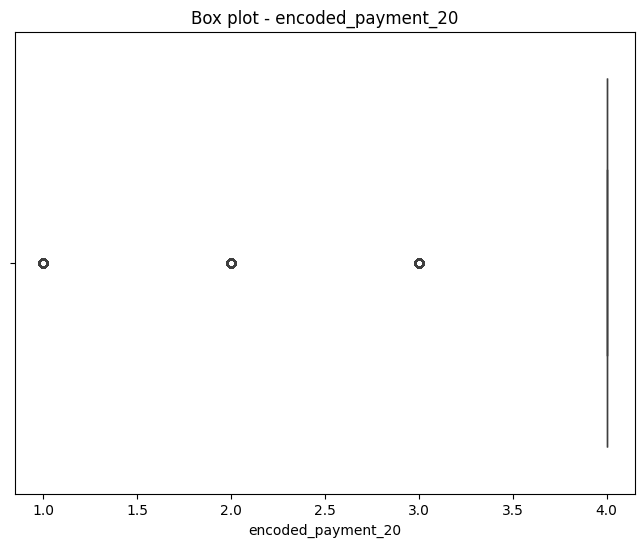

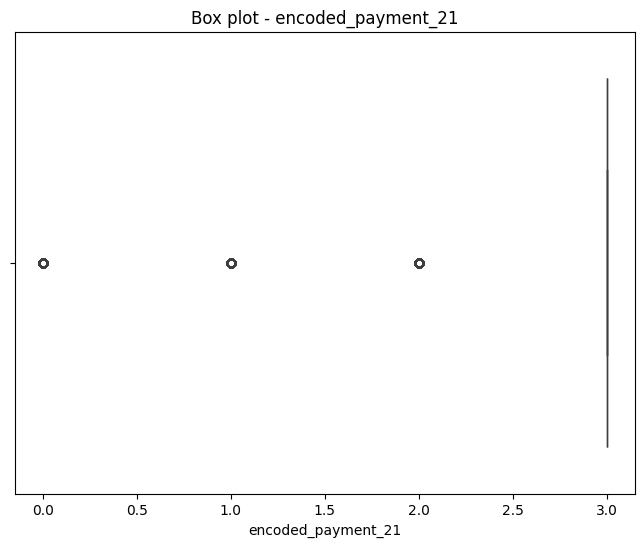

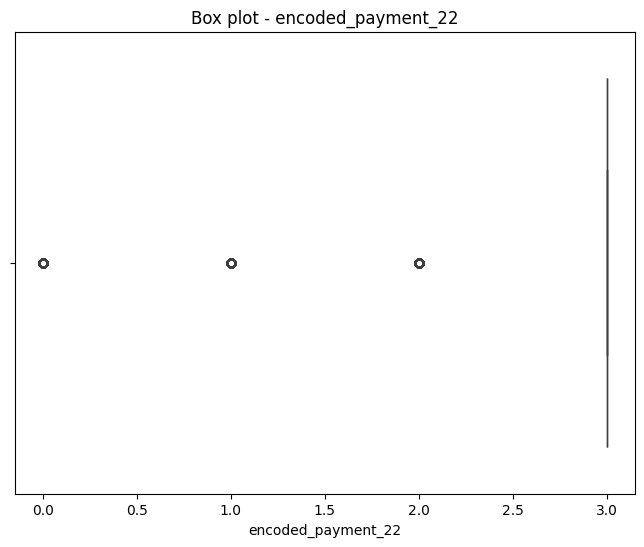

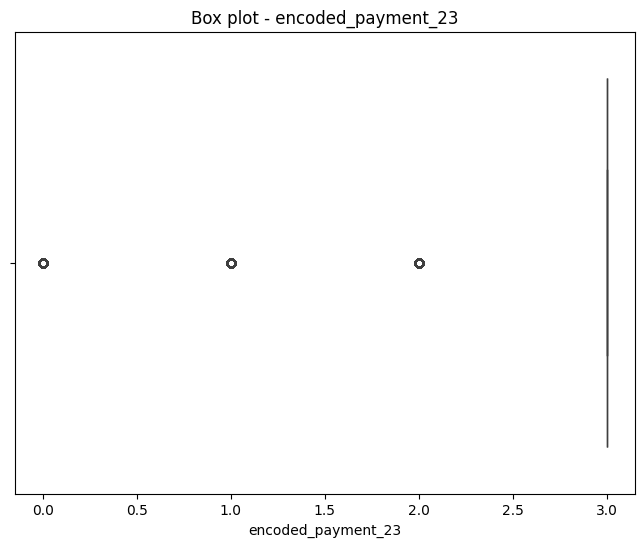

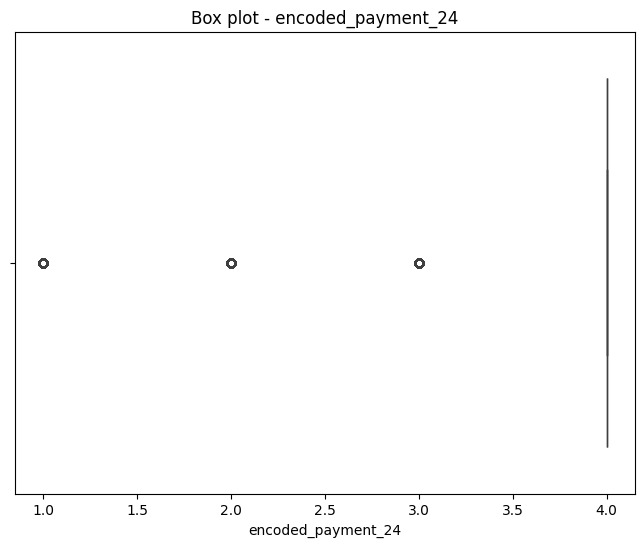

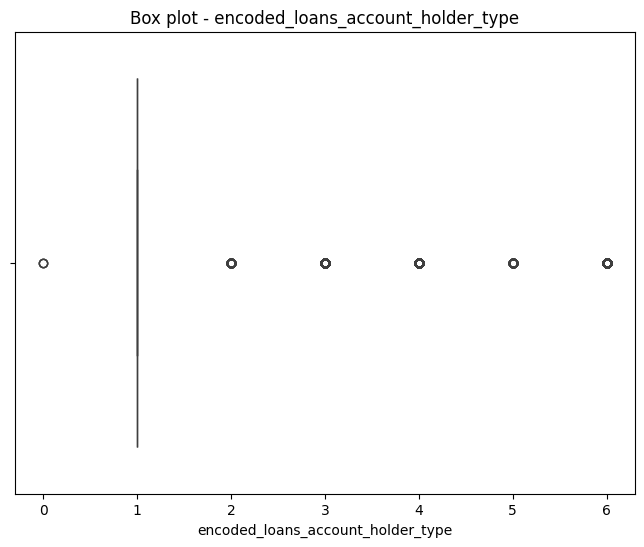

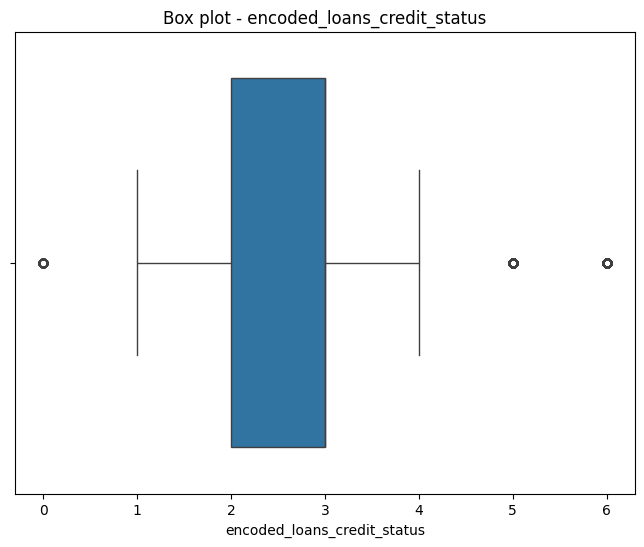

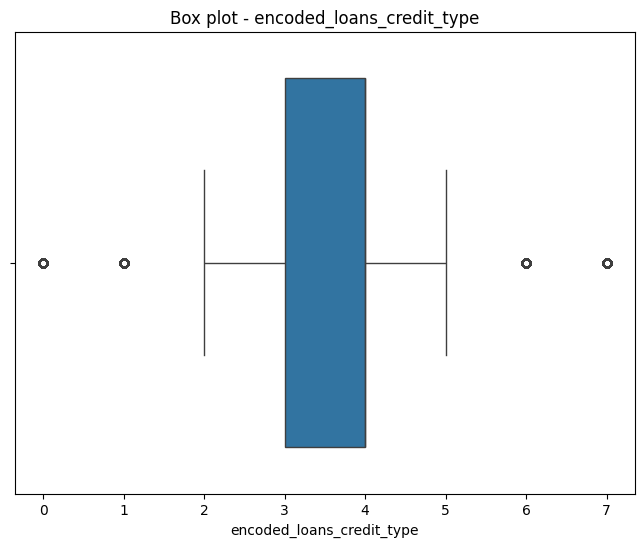

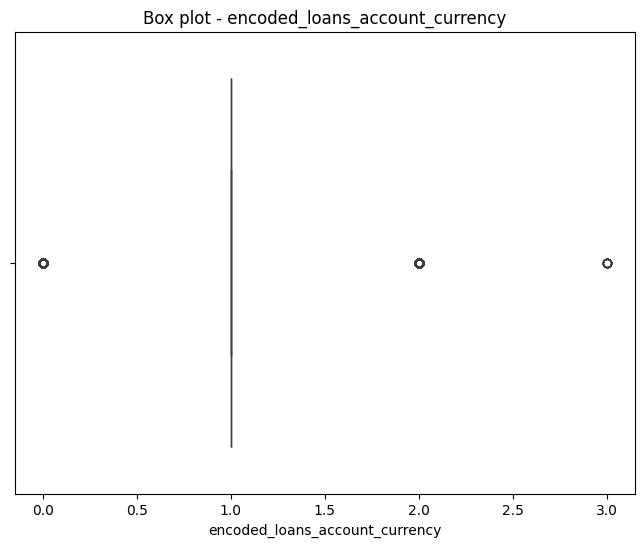

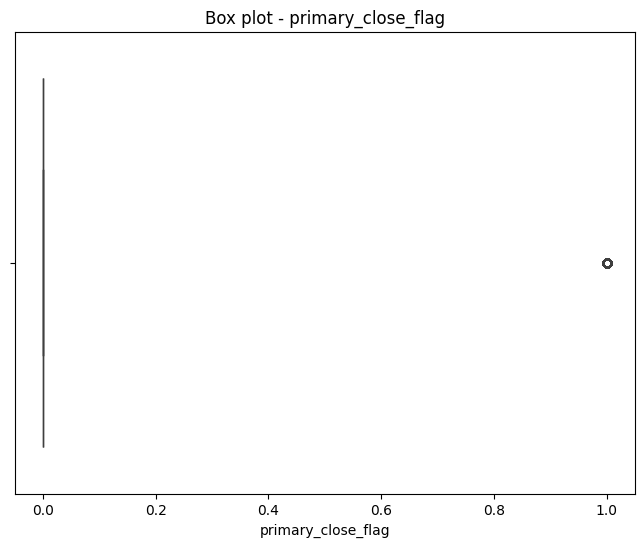

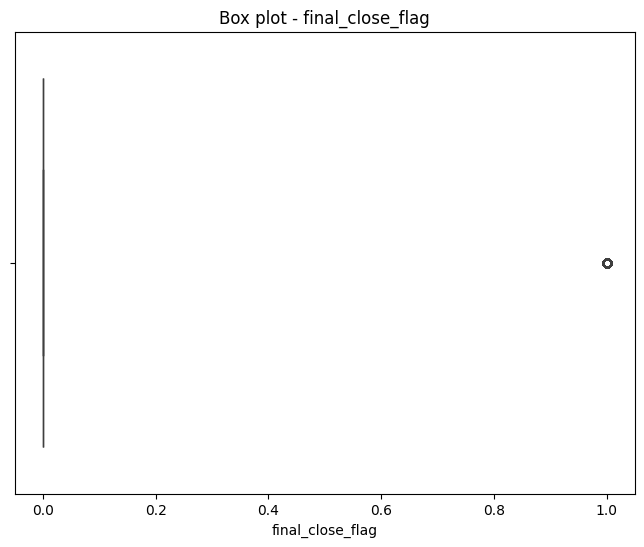

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df is your DataFrame
num_cols = training_df.select_dtypes(include=['int64', 'float64']).columns

n = len(num_cols)
ncols = 2
nrows = n // ncols if n % ncols == 0 else n // ncols + 1

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 6*nrows))

for i, col in enumerate(num_cols):
    r, c = np.divmod(i, ncols)
    sns.boxplot(x=training_df[col], ax=axs[r, c])
    axs[r, c].set_title('Box plot - '+str(col))

# Remove empty subplots
if n % ncols != 0:
    for j in range(n, nrows*ncols):
        fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()

## Preprocessing

In [ ]:
def fill_missing_value(df):
    encoded_features = ['encoded_payment_' + str(i) for i in range(25)]
    imputer = SimpleImputer(strategy ='most_frequent')
    df[encoded_features] = imputer.fit_transform(df[encoded_features])

    return df

In [ ]:
def drop_columns(df):
    drop_columns = ['customer_id','firstname','lastname']
    df = df.drop(columns=drop_columns)
    return df

In [ ]:
label = ['primary_close_flag', 'final_close_flag']

In [ ]:
def categorical_to_numerals(df):
    columns_to_encode = [
      'is_zero_loans_within_5_days',
      'is_zero_loans_within_5_to_30_days',
      'is_zero_loans_within_30_to_60_days',
      'is_zero_loans_within_60_to_90_days',
      'is_zero_loans_over_90_days',
      'is_zero_utilization',
      'is_zero_over_limit_count',
      'is_zero_max_over_limit_count'
      ]

    encoder = LabelEncoder()

    for column in columns_to_encode:
        df[column] = encoder.fit_transform(df[column])
    #print('column : ',df.columns)

    return df

In [ ]:
def normalization(df):
    min_max_scaler = MinMaxScaler()
    label = ['primary_close_flag', 'final_close_flag']

    for column in cols:
        if column not in label and pd.api.types.is_numeric_dtype(df[column]):
            df[column] = min_max_scaler.fit_transform(df[[column]])
    return df

In [ ]:
def preprocessing(df):
    print("Starting Step 1 : fill_missing_value")
    df = fill_missing_value(df)
    print("Step 1 : fill_missing_value Completed")
    print("Starting Step 2 : dropping Columns")
    #df = drop_columns(df)
    print("Step 2 : dropping Columns Completed")
    df = normalization(df)
    print("Starting Step 4 : categorical_to_numerals")
    df = categorical_to_numerals(df)
    print("Step 4 : categorical_to_numerals Completed")
    return df

In [ ]:
training_df = preprocessing(training_df)

Starting Step 1 : fill_missing_value
Step 1 : fill_missing_value Completed
Starting Step 2 : dropping Columns
Step 2 : dropping Columns Completed
Starting Step 4 : categorical_to_numerals
Step 4 : categorical_to_numerals Completed


In [ ]:
testing_df = preprocessing(testing_df)

Starting Step 1 : fill_missing_value
Step 1 : fill_missing_value Completed
Starting Step 2 : dropping Columns
Step 2 : dropping Columns Completed
Starting Step 4 : categorical_to_numerals
Step 4 : categorical_to_numerals Completed


## Exploratory Analysis

In [ ]:
sum(training_df['primary_close_flag'] != training_df['final_close_flag'])/len(training_df)
# Checking Propotion of 2 Output Labels which different in primary and Final Flags

0.16817870483990768

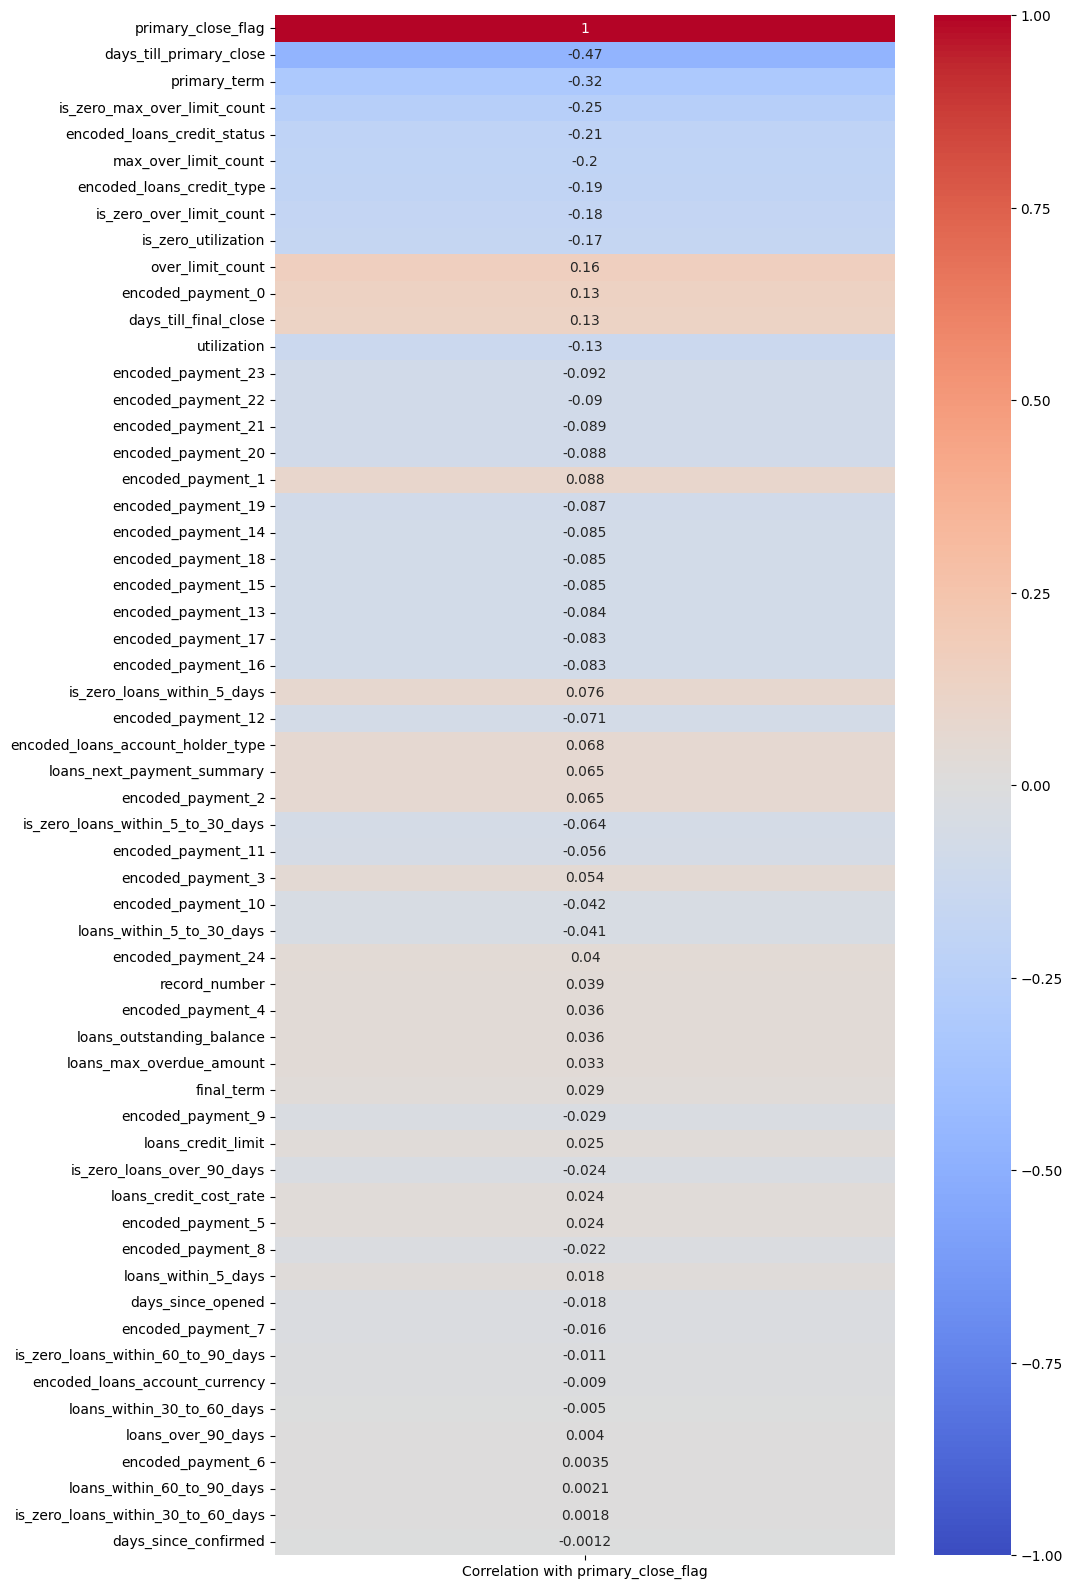

In [ ]:
# Correlation Matrix:

correlation_matrix = training_df.corrwith(training_df['primary_close_flag']).iloc[:-1].to_frame()
correlation_matrix.columns = ['Correlation with primary_close_flag']
correlation_matrix['Abs Correlation'] = correlation_matrix.abs()

sorted_correlations = correlation_matrix.sort_values('Abs Correlation', ascending=False)['Correlation with primary_close_flag']

fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

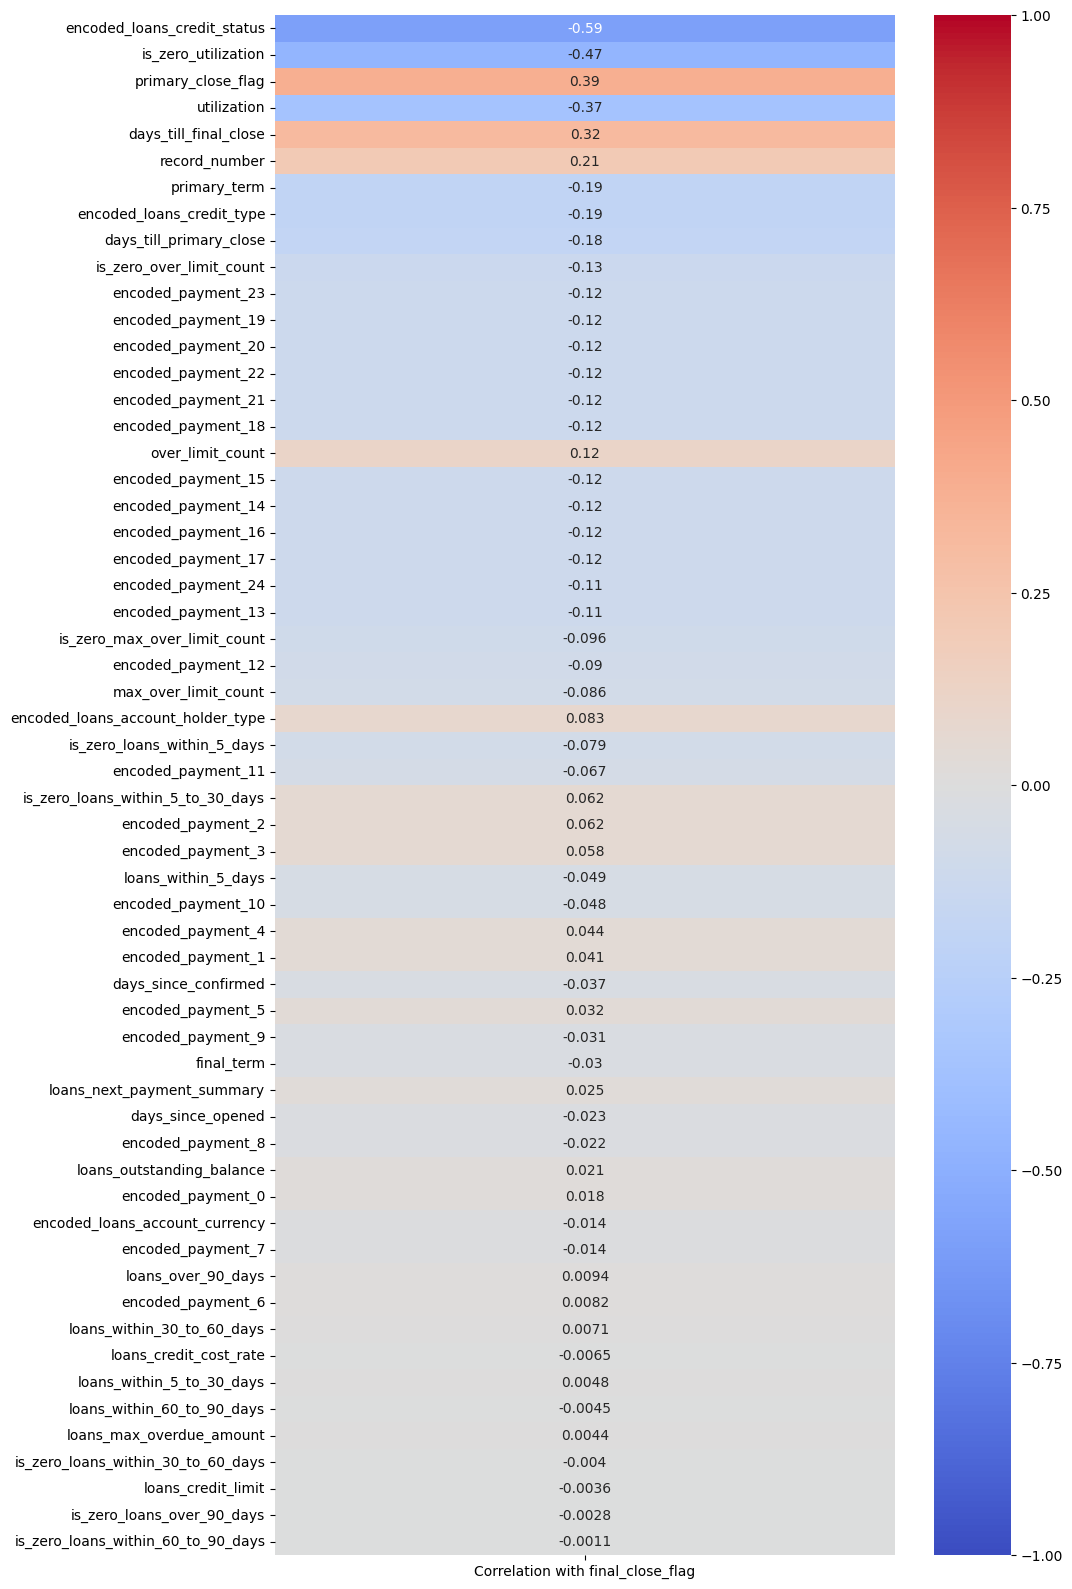

In [ ]:
# Correlation Matrix for Final_close_flag:

correlation_matrix = training_df.corrwith(training_df['final_close_flag']).iloc[:-1].to_frame()
correlation_matrix.columns = ['Correlation with final_close_flag']
correlation_matrix['Abs Correlation'] = correlation_matrix.abs()

sorted_correlations = correlation_matrix.sort_values('Abs Correlation', ascending=False)['Correlation with final_close_flag']

fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

In [ ]:
correlation = training_df[['primary_close_flag', 'final_close_flag']].corr()
correlation

,primary_close_flag,final_close_flag
primary_close_flag,1.0,0.4
final_close_flag,0.4,1.0


### New Correlation Plots

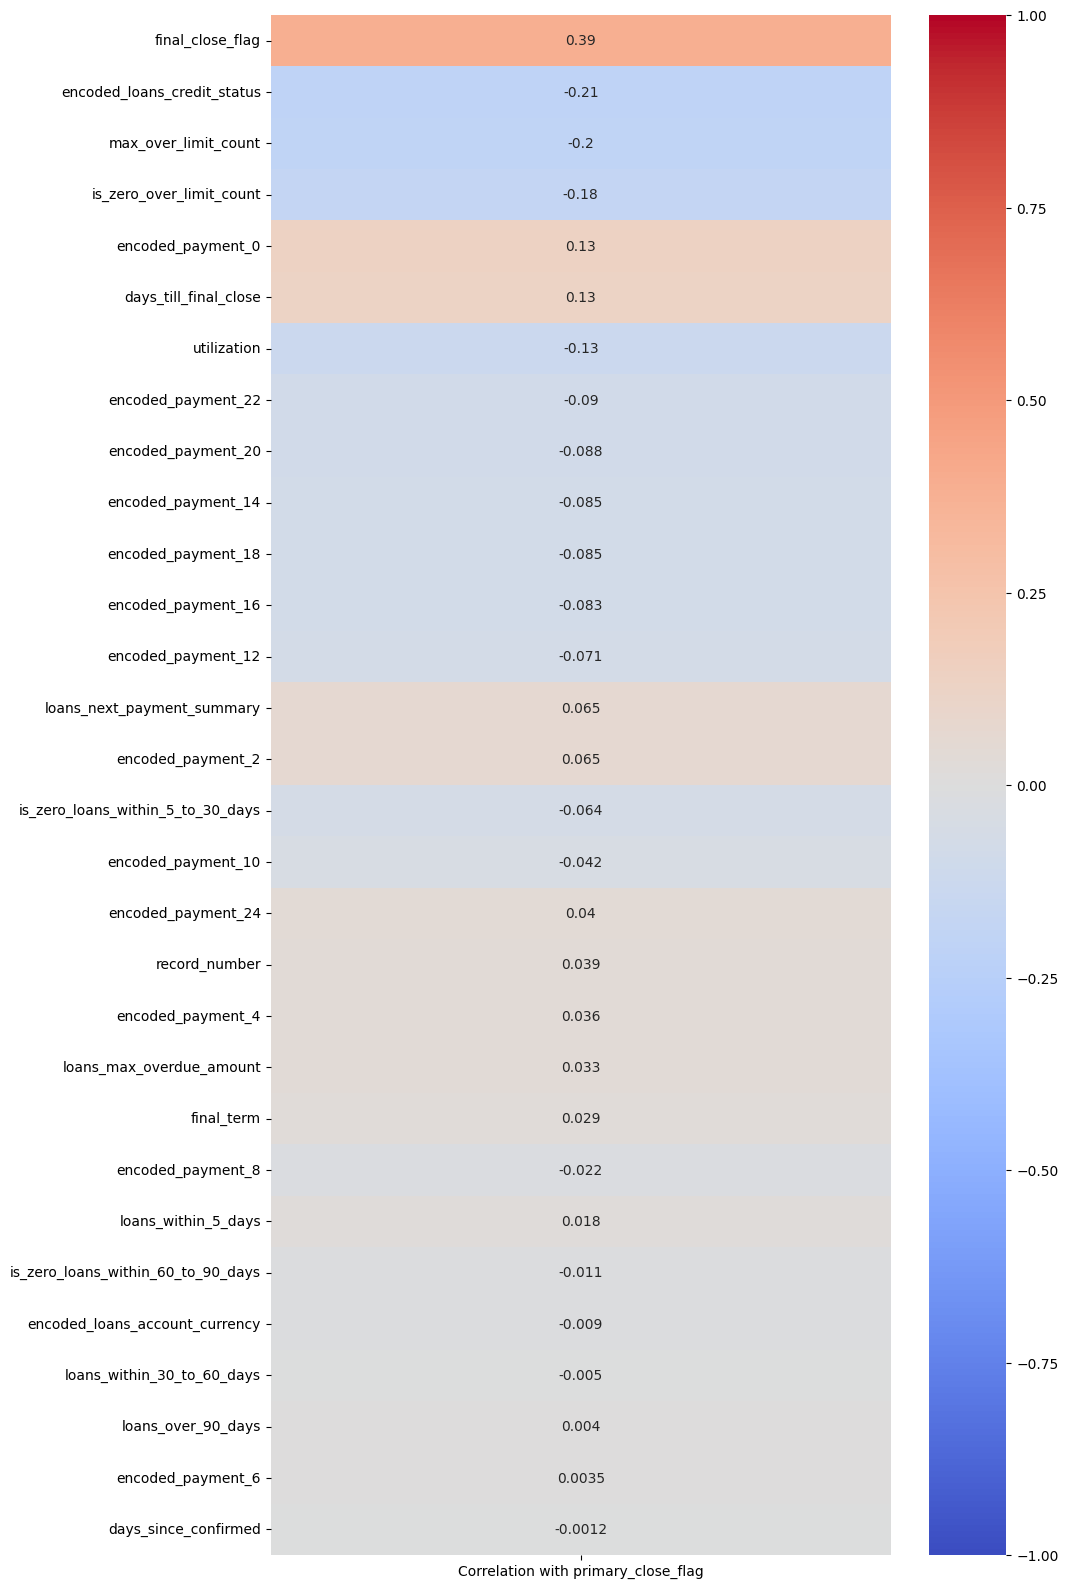

In [ ]:
# Correlation Matrix:

correlation_matrix = training_df.corrwith(training_df['primary_close_flag']).iloc[::-2].to_frame()
#training_df.iloc[:, :-2].join(training_df.iloc[:, -1])
correlation_matrix.columns = ['Correlation with primary_close_flag']
correlation_matrix['Abs Correlation'] = correlation_matrix.abs()

sorted_correlations = correlation_matrix.sort_values('Abs Correlation', ascending=False)['Correlation with primary_close_flag']

fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

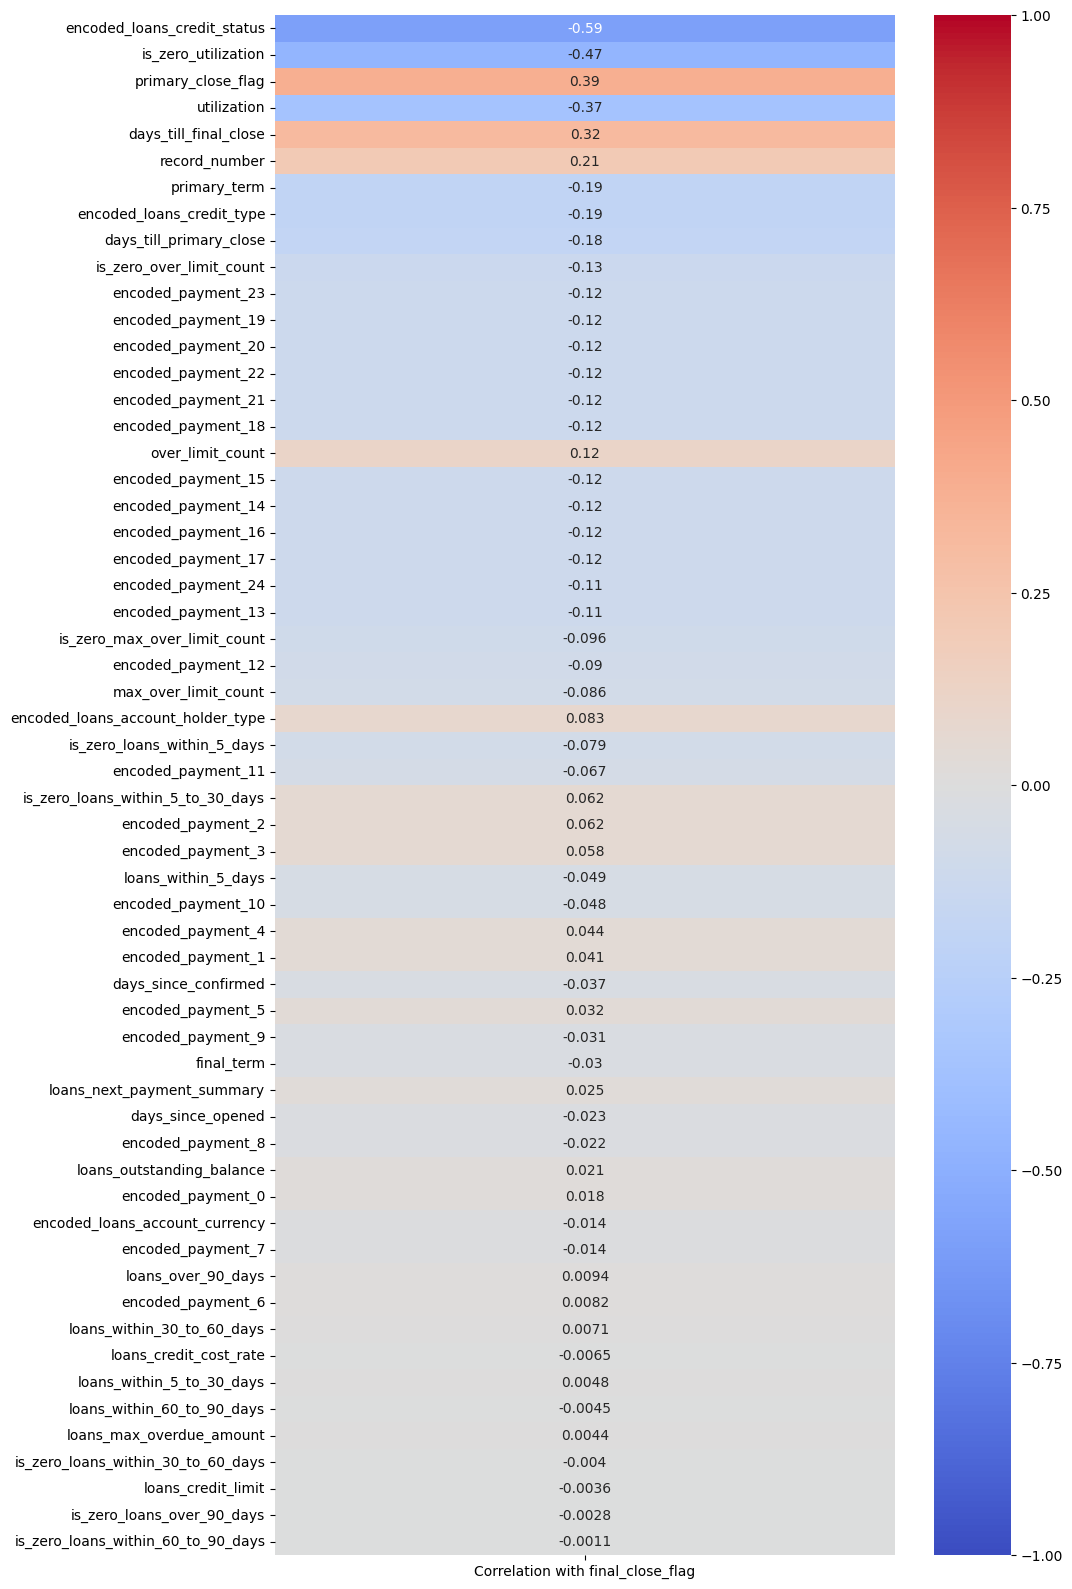

In [ ]:
# Correlation Matrix for Final_close_flag:

correlation_matrix = training_df.corrwith(training_df['final_close_flag']).iloc[:-1].to_frame()
correlation_matrix.columns = ['Correlation with final_close_flag']
correlation_matrix['Abs Correlation'] = correlation_matrix.abs()

sorted_correlations = correlation_matrix.sort_values('Abs Correlation', ascending=False)['Correlation with final_close_flag']

fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def split_data():
    #Splitting the data for Training
    x = training_df.drop(columns=label)
    y = training_df[label]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)
    return x,y,x_train, x_test, y_train, y_test

In [ ]:
print("splitting data")
x,y,x_train, x_test, y_train, y_test = split_data()

splitting data


# Neural Network Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
from keras.regularizers import l2
from keras.regularizers import l1
from keras.layers import Dropout

In [ ]:
# Define the model
model1 = Sequential()

# Add the first hidden layer with 128 nodes
model1.add(Dense(128, input_dim=57, activation='relu'))

# Add the layers with 64 & 32 nodes
model1.add(Dense(64, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(32, activation='relu'))

model1.add(Dense(8, activation='relu'))

# Add the output layer with 2 nodes (for 2 classes)
model1.add(Dense(2, activation='sigmoid'))  # Activation Functaion here

# Compile the model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Change here

In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 128)               7424      
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dense_18 (Dense)            (None, 32)                1056      
                                                                 
 dense_19 (Dense)            (None, 8)                 264       
                                                                 
 dense_20 (Dense)            (None, 2)                

In [ ]:
 history1_new = model1.fit(x_train, y_train, epochs=20, batch_size=64,validation_split=0.2,
                          callbacks=[tf.keras.callbacks.EarlyStopping(patience=7)])

Epoch 1/20
9684/9684 [==============================] - 47s 5ms/step - loss: 0.1127 - accuracy: 0.4194 - val_loss: 0.0487 - val_accuracy: 0.7483
Epoch 2/20
9684/9684 [==============================] - 36s 4ms/step - loss: 0.0273 - accuracy: 0.7601 - val_loss: 0.0096 - val_accuracy: 0.8140
Epoch 3/20
9684/9684 [==============================] - 33s 3ms/step - loss: 0.0110 - accuracy: 0.7561 - val_loss: 0.0038 - val_accuracy: 0.7142
Epoch 4/20
9684/9684 [==============================] - 37s 4ms/step - loss: 0.0084 - accuracy: 0.7569 - val_loss: 0.0031 - val_accuracy: 0.7491
Epoch 5/20
9684/9684 [==============================] - 41s 4ms/step - loss: 0.0070 - accuracy: 0.7418 - val_loss: 0.0131 - val_accuracy: 0.7421
Epoch 6/20
9684/9684 [==============================] - 31s 3ms/step - loss: 0.0061 - accuracy: 0.7147 - val_loss: 0.0061 - val_accuracy: 0.8122
Epoch 7/20
9684/9684 [==============================] - 30s 3ms/step - loss: 0.0054 - accuracy: 0.7161 - val_loss: 0.0029 - val_ac

In [ ]:
# Define the model
model_with_L2 = Sequential()

# Add the first hidden layer with 128 nodes
model_with_L2.add(Dense(128, input_dim=57, activation='relu'))

# Add the layers with 64 & 32 nodes
model_with_L2.add(Dense(64, activation='relu'))
model_with_L2.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model_with_L2.add(Dense(32, activation='relu'))
model_with_L2.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model_with_L2.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model_with_L2.add(Dropout(0.5))
model_with_L2.add(Dense(32, activation='relu'))
model_with_L2.add(Dense(8, activation='relu'))

# Add the output layer with 2 nodes (for 2 classes)
model_with_L2.add(Dense(2, activation='sigmoid'))  # Activation Functaion here

# Compile the model
model_with_L2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Change here


In [ ]:
historyL2_1 = model_with_L2.fit(x_train, y_train, epochs=20, batch_size=64,validation_split=0.2,
                          callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/20
9684/9684 [==============================] - 35s 3ms/step - loss: 0.2095 - accuracy: 0.2652 - val_loss: 0.1470 - val_accuracy: 0.1879
Epoch 2/20
9684/9684 [==============================] - 36s 4ms/step - loss: 0.1172 - accuracy: 0.7249 - val_loss: 0.1600 - val_accuracy: 0.3641
Epoch 3/20
9684/9684 [==============================] - 33s 3ms/step - loss: 0.1134 - accuracy: 0.8260 - val_loss: 0.1399 - val_accuracy: 0.2533
Epoch 4/20
9684/9684 [==============================] - 35s 4ms/step - loss: 0.1144 - accuracy: 0.8467 - val_loss: 0.1143 - val_accuracy: 0.2321
Epoch 5/20
9684/9684 [==============================] - 33s 3ms/step - loss: 0.1109 - accuracy: 0.8348 - val_loss: 0.1373 - val_accuracy: 0.7677
Epoch 6/20
9684/9684 [==============================] - 35s 4ms/step - loss: 0.1232 - accuracy: 0.7266 - val_loss: 0.1285 - val_accuracy: 0.3368
Epoch 7/20
9684/9684 [==============================] - 33s 3ms/step - loss: 0.1354 - accuracy: 0.6283 - val_loss: 0.1300 - val_ac

In [ ]:
historyL2_1 = model_with_L2.fit(x_train, y_train, epochs=10, batch_size=64,validation_split=0.2,
                          callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/10
9684/9684 [==============================] - 34s 3ms/step - loss: 0.1142 - accuracy: 0.5417 - val_loss: 0.1458 - val_accuracy: 0.9103
Epoch 2/10
9684/9684 [==============================] - 36s 4ms/step - loss: 0.0819 - accuracy: 0.6636 - val_loss: 0.1404 - val_accuracy: 0.9902
Epoch 3/10
9684/9684 [==============================] - 33s 3ms/step - loss: 0.1186 - accuracy: 0.3097 - val_loss: 0.1218 - val_accuracy: 0.9207
Epoch 4/10
9684/9684 [==============================] - 35s 4ms/step - loss: 0.0780 - accuracy: 0.4803 - val_loss: 0.0710 - val_accuracy: 0.9196
Epoch 5/10
9684/9684 [==============================] - 35s 4ms/step - loss: 0.0765 - accuracy: 0.5900 - val_loss: 0.4000 - val_accuracy: 0.9087
Epoch 6/10
9684/9684 [==============================] - 35s 4ms/step - loss: 0.1313 - accuracy: 0.2760 - val_loss: 0.2379 - val_accuracy: 0.2444
Epoch 7/10
9684/9684 [==============================] - 35s 4ms/step - loss: 0.0738 - accuracy: 0.3480 - val_loss: 0.2501 - val_ac

In [ ]:
# Save the model
model1.save('/content/drive/MyDrive/Colab Notebooks/Hackathon/Model_22_1.h5')

In [ ]:
model_with_L2.save('/content/drive/MyDrive/Colab Notebooks/Hackathon/Model_22_L2_2.h5')

In [ ]:
# Define the model
model_with_L1 = Sequential()

# Add the first hidden layer with 128 nodes
model_with_L1.add(Dense(128, input_dim=57, activation='relu'))

# Add the layers with 64 & 32 nodes
model_with_L1.add(Dense(64, activation='relu'))
model_with_L1.add(Dense(64, activation='relu', kernel_regularizer=l1(0.01)))
model_with_L1.add(Dense(32, activation='relu'))
model_with_L1.add(Dense(32, activation='relu', kernel_regularizer=l1(0.01)))
model_with_L1.add(Dense(32, activation='relu', kernel_regularizer=l1(0.01)))
model_with_L1.add(Dropout(0.5))
model_with_L1.add(Dense(32, activation='relu'))
model_with_L1.add(Dense(8, activation='relu'))

# Add the output layer with 2 nodes (for 2 classes)
model_with_L1.add(Dense(2, activation='sigmoid'))  # Activation Functaion here

# Compile the model
model_with_L1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Change here


In [ ]:
historyL1_1 = model_with_L1.fit(x_train, y_train, epochs=20, batch_size=64,validation_split=0.2,
                          callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/20
9684/9684 [==============================] - 38s 4ms/step - loss: 0.3324 - accuracy: 0.2062 - val_loss: 0.2815 - val_accuracy: 0.2480
Epoch 2/20
9684/9684 [==============================] - 39s 4ms/step - loss: 0.1837 - accuracy: 0.3220 - val_loss: 0.2204 - val_accuracy: 0.3903
Epoch 3/20
9684/9684 [==============================] - 38s 4ms/step - loss: 0.1508 - accuracy: 0.8427 - val_loss: 0.2177 - val_accuracy: 0.7604
Epoch 4/20
9684/9684 [==============================] - 37s 4ms/step - loss: 0.1237 - accuracy: 0.9049 - val_loss: 0.1409 - val_accuracy: 0.7658
Epoch 5/20
9684/9684 [==============================] - 35s 4ms/step - loss: 0.1135 - accuracy: 0.9111 - val_loss: 0.1445 - val_accuracy: 0.9085
Epoch 6/20
9684/9684 [==============================] - 36s 4ms/step - loss: 0.1214 - accuracy: 0.9200 - val_loss: 0.1425 - val_accuracy: 0.5592
Epoch 7/20
9684/9684 [==============================] - 35s 4ms/step - loss: 0.1026 - accuracy: 0.9204 - val_loss: 0.1653 - val_ac

In [ ]:
model_with_L1.save('/content/drive/MyDrive/Colab Notebooks/Hackathon/Model_22_L1_1.h5')

In [ ]:
historyL1_1_1 = model_with_L1.fit(x_train, y_train, epochs=20, batch_size=64,validation_split=0.2,
                          callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/20
9684/9684 [==============================] - 37s 4ms/step - loss: 0.0754 - accuracy: 0.9129 - val_loss: 0.2414 - val_accuracy: 0.8495
Epoch 2/20
9684/9684 [==============================] - 42s 4ms/step - loss: 0.0944 - accuracy: 0.9001 - val_loss: 0.6232 - val_accuracy: 0.7949
Epoch 3/20
9684/9684 [==============================] - 41s 4ms/step - loss: 0.1207 - accuracy: 0.8278 - val_loss: 0.8967 - val_accuracy: 0.6134
Epoch 4/20
9684/9684 [==============================] - 42s 4ms/step - loss: 0.1376 - accuracy: 0.5399 - val_loss: 1.2500 - val_accuracy: 0.2433
Epoch 5/20
9684/9684 [==============================] - 55s 6ms/step - loss: 0.1125 - accuracy: 0.5590 - val_loss: 0.9193 - val_accuracy: 0.2794
Epoch 6/20
9684/9684 [==============================] - 46s 5ms/step - loss: 0.0975 - accuracy: 0.6687 - val_loss: 1.5094 - val_accuracy: 0.2441


In [ ]:
# Define the model
model_with_L1_L2 = Sequential()

# Add the first hidden layer with 128 nodes
model_with_L1_L2.add(Dense(128, input_dim=57, activation='relu'))

# Add the layers with 64 & 32 nodes
model_with_L1_L2.add(Dense(64, activation='relu'))
model_with_L1_L2.add(Dense(64, activation='relu'))
#model_with_L1_L2.add(Dense(64, activation='relu', kernel_regularizer=l2(10)))
#model_with_L1_L2.add(Dense(64, activation='relu', kernel_regularizer=l1(0.01)))
#model_with_L1_L2.add(Dense(64, activation='relu', kernel_regularizer=l2(10)))
#model_with_L1_L2.add(Dropout(0.5))
#model_with_L1_L2.add(Dense(32, activation='relu', kernel_regularizer=l2(10)))
#model_with_L1_L2.add(Dense(32, activation='relu', kernel_regularizer=l2(10)))
model_with_L1_L2.add(Dense(32, activation='relu'))
model_with_L1_L2.add(Dense(32, activation='relu'))
model_with_L1_L2.add(Dense(32, activation='relu'))
model_with_L1_L2.add(Dense(32, activation='relu'))
model_with_L1_L2.add(Dense(8, activation='relu'))
model_with_L1_L2.add(Dense(8, activation='relu'))

# Add the output layer with 2 nodes (for 2 classes)
model_with_L1_L2.add(Dense(2, activation='sigmoid'))  # Activation Functaion here

# Compile the model
model_with_L1_L2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Change here


In [ ]:
model_with_L1_L2.summary()

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_734 (Dense)           (None, 128)               7424      
                                                                 
 dense_735 (Dense)           (None, 64)                8256      
                                                                 
 dense_736 (Dense)           (None, 64)                4160      
                                                                 
 dense_737 (Dense)           (None, 32)                2080      
                                                                 
 dense_738 (Dense)           (None, 32)                1056      
                                                                 
 dense_739 (Dense)           (None, 32)                1056      
                                                                 
 dense_740 (Dense)           (None, 32)              

In [ ]:
historyL1L2_1_1 = model_with_L1.fit(x_train, y_train, epochs=20, batch_size=64,validation_split=0.2
                                    #,callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)]
                                    )

Epoch 1/20
  79/9684 [..............................] - ETA: 25s - loss: 0.0716 - accuracy: 0.7429

KeyboardInterrupt: 

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

# list of alphas to try
alphas = [0.01, 0.1, 1.0, 5.0, 10.0, 50.0, 100.0]

# initialize best_score and best_alpha
best_score = -1
best_alpha = None

for alpha in alphas:
    #ridge = Ridge(alpha=alpha)
    lasso = Lasso(alpha=alpha)
    scores = cross_val_score(lasso, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_score = np.mean(scores)
    if mean_score > best_score:
        best_score = mean_score
        best_alpha = alpha

print(f"Best alpha: {best_alpha}")


Best alpha: 0.01


In [ ]:
#L2 Ridge = Best alpha: 10.0
#L1 Lasso = Best alpha: 0.01